# Covid-19 Data Analysis

# What is covid 19?
-Coronaviruses are a large family of viruses that usually cause mild to moderate upper-respiratory tract illnesses in humans. However, three coronaviruses have caused more serious and fatal disease in people: SARS coronavirus (SARS-CoV), which emerged in November 2002 and causes severe acute respiratory syndrome (SARS); MERS coronavirus (MERS-CoV), which emerged in 2012 and causes Middle East respiratory syndrome (MERS); and SARS-CoV-2, which emerged in 2019 and causes coronavirus disease 2019 (COVID-19).

Building on previous research on SARS and MERS, NIAID scientists and NIAID-supported researchers mobilized quickly to develop COVID-19 therapeutics, vaccines and diagnostics. Researchers continue to conduct basic research to understand how coronaviruses infect cells and causes disease, and what interventions can detect, prevent and stop the spread of disease.
![Coronavirus  pratical Image](https://theshillongtimes.com/wp-content/uploads/2020/10/Covid-19.jpg)

## importing the libraries

In [14]:
from __future__ import print_function 
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px 
import plotly.graph_objects as go
import ipywidgets as widgets


In [15]:
covid_df=pd.read_csv("covid_19_data.csv")
covid_df.head(10)

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   
5    6      01/22/2020      Guangdong  Mainland China  1/22/2020 17:00   
6    7      01/22/2020        Guangxi  Mainland China  1/22/2020 17:00   
7    8      01/22/2020        Guizhou  Mainland China  1/22/2020 17:00   
8    9      01/22/2020         Hainan  Mainland China  1/22/2020 17:00   
9   10      01/22/2020          Hebei  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
5       26.0     0.0        0.0  
6        2.0     0.0        0.0  
7        1.0     0.0        0.0  
8        4.0     0.0        0.0  
9        1.0     0.0        0.0

In [16]:
covid_df.shape

(306429, 8)

In [17]:
#check the info
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [18]:
#check the statistical info
covid_df.describe()

SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.567091e+04    2036.403268  5.042029e+04
std     88458.577156  2.775516e+05    6410.938048  2.015124e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     76608.000000  1.042000e+03      13.000000  1.100000e+01
50%    153215.000000  1.037500e+04     192.000000  1.751000e+03
75%    229822.000000  5.075200e+04    1322.000000  2.027000e+04
max    306429.000000  5.863138e+06  112385.000000  6.399531e+06

In [19]:
# find out the starting cases in which country
covid_df['Country/Region'].value_counts()

Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: Country/Region, Length: 229, dtype: int64

In [20]:
#converting the observation date column to datatime module
covid_df["ObservationDate"]=pd.to_datetime(covid_df["ObservationDate"])
covid_df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
1    2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
2    3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
3    4      2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
4    5      2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [21]:
covid_df.tail()

SNo ObservationDate     Province/State  Country/Region  \
306424  306425      2021-05-29  Zaporizhia Oblast         Ukraine   
306425  306426      2021-05-29            Zeeland     Netherlands   
306426  306427      2021-05-29           Zhejiang  Mainland China   
306427  306428      2021-05-29    Zhytomyr Oblast         Ukraine   
306428  306429      2021-05-29       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0

In [22]:
#find out the total cases of mainland China
china_df=covid_df[covid_df["Country/Region"]=="Mainland China"]
china_df

SNo ObservationDate Province/State  Country/Region  \
0            1      2020-01-22          Anhui  Mainland China   
1            2      2020-01-22        Beijing  Mainland China   
2            3      2020-01-22      Chongqing  Mainland China   
3            4      2020-01-22         Fujian  Mainland China   
4            5      2020-01-22          Gansu  Mainland China   
...        ...             ...            ...             ...   
306340  306341      2021-05-29          Tibet  Mainland China   
306368  306369      2021-05-29        Unknown  Mainland China   
306412  306413      2021-05-29       Xinjiang  Mainland China   
306420  306421      2021-05-29         Yunnan  Mainland China   
306426  306427      2021-05-29       Zhejiang  Mainland China   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0        0.0  
2           1/22/2020 17:00        6.0     0.0        0.0  
3           1/22/2020 17:00        1.0     0.0        0.0  
4           1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
306340  2021-05-30 04:20:55        1.0     0.0        1.0  
306368  2021-05-30 04:20:55        0.0     0.0       10.0  
306412  2021-05-30 04:20:55      980.0     3.0      977.0  
306420  2021-05-30 04:20:55      352.0     2.0      331.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  

[15758 rows x 8 columns]

In [23]:
total_cases_of_china=china_df["Confirmed"].sum()
total_cases_of_china

40822596.0

In [24]:
#find out the daily cases of Mainland China 
daily_cases_china=china_df.groupby(by="ObservationDate")
daily_cases_china

In [25]:
dt_series=pd.to_datetime(china_df['ObservationDate'])
dt_series

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
306340   2021-05-29
306368   2021-05-29
306412   2021-05-29
306420   2021-05-29
306426   2021-05-29
Name: ObservationDate, Length: 15758, dtype: datetime64[ns]

In [26]:
sorted_df=china_df.sort_values(by='ObservationDate')
sorted_df

SNo ObservationDate  Province/State  Country/Region  \
0            1      2020-01-22           Anhui  Mainland China   
34          35      2020-01-22        Zhejiang  Mainland China   
33          34      2020-01-22          Yunnan  Mainland China   
32          33      2020-01-22        Xinjiang  Mainland China   
30          31      2020-01-22           Tibet  Mainland China   
...        ...             ...             ...             ...   
305892  305893      2021-05-29         Beijing  Mainland China   
305858  305859      2021-05-29           Anhui  Mainland China   
306420  306421      2021-05-29          Yunnan  Mainland China   
306041  306042      2021-05-29  Inner Mongolia  Mainland China   
306426  306427      2021-05-29        Zhejiang  Mainland China   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
34          1/22/2020 17:00       10.0     0.0        0.0  
33          1/22/2020 17:00        1.0     0.0        0.0  
32          1/22/2020 17:00        0.0     0.0        0.0  
30          1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
305892  2021-05-30 04:20:55     1059.0     9.0     1046.0  
305858  2021-05-30 04:20:55     1004.0     6.0      994.0  
306420  2021-05-30 04:20:55      352.0     2.0      331.0  
306041  2021-05-30 04:20:55      387.0     1.0      383.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  

[15758 rows x 8 columns]

In [27]:
month_series=dt_series.dt.month
month_series

0         1
1         1
2         1
3         1
4         1
         ..
306340    5
306368    5
306412    5
306420    5
306426    5
Name: ObservationDate, Length: 15758, dtype: int64

In [28]:
month_series=dt_series.dt.month
month_series

0         1
1         1
2         1
3         1
4         1
         ..
306340    5
306368    5
306412    5
306420    5
306426    5
Name: ObservationDate, Length: 15758, dtype: int64

In [29]:
day_series=dt_series.dt.day
day_series

0         22
1         22
2         22
3         22
4         22
          ..
306340    29
306368    29
306412    29
306420    29
306426    29
Name: ObservationDate, Length: 15758, dtype: int64

In [30]:
covid_df['Month']=month_series
covid_df['Day']=day_series
covid_df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      2020-01-22          Anhui  Mainland China  1/22/2020 17:00   
1    2      2020-01-22        Beijing  Mainland China  1/22/2020 17:00   
2    3      2020-01-22      Chongqing  Mainland China  1/22/2020 17:00   
3    4      2020-01-22         Fujian  Mainland China  1/22/2020 17:00   
4    5      2020-01-22          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  Month   Day  
0        1.0     0.0        0.0    1.0  22.0  
1       14.0     0.0        0.0    1.0  22.0  
2        6.0     0.0        0.0    1.0  22.0  
3        1.0     0.0        0.0    1.0  22.0  
4        0.0     0.0        0.0    1.0  22.0

In [31]:
group_2020_month=covid_df.groupby(by="Month")
group_2020_month.describe()

SNo                                                               \
        count           mean            std       min        25%       50%   
Month                                                                        
1.0    1296.0  156507.635802   86753.787912       1.0  193039.75  200742.5   
2.0    1795.0  114084.529805  112805.198579     514.0    1553.50    2823.0   
3.0    1979.0  128267.713997  121706.998974    2897.0    6060.00  237858.0   
4.0    1920.0  144317.909375  128677.377657   11022.0   15823.25  141014.0   
5.0    1920.0  156321.549479  134677.325436   20728.0   25694.75   32496.5   
6.0     960.0   43623.964583    6255.664969   33154.0   38056.75   43560.0   
7.0     992.0   65959.253024    6616.482713   54652.0   60206.75   65833.5   
8.0     992.0   89042.953629    6680.151258   77572.0   83235.75   88964.5   
9.0     960.0  111799.229167    6464.517141  100708.0  106122.75  111801.0   
10.0    992.0  134582.909274    6693.837610  123098.0  128761.75  134500.5   
11.0    960.0  157494.656250    6568.632155  146281.0  151716.75  157472.0   
12.0    992.0  180731.625000    6829.993553  169007.0  174792.75  180649.5   

                           Confirmed               ... Recovered           \
             75%       max     count         mean  ...       75%      max   
Month                                              ...                      
1.0    208428.00  216157.0    1296.0  2140.489969  ...    934.00  63637.0   
2.0    226864.00  237577.0    1795.0  2309.321448  ...    749.00  63639.0   
3.0    249447.50  261292.0    1979.0  2677.560384  ...    977.00  63639.0   
4.0    272816.25  284242.0    1920.0  2699.745833  ...    978.75  64435.0   
5.0    295001.25  306427.0    1920.0  2711.629167  ...    985.00  63645.0   
6.0     48974.25   54458.0     960.0  2601.378125  ...    821.50  63623.0   
7.0     71749.75   77378.0     992.0  2616.031250  ...    919.00  63623.0   
8.0     94889.75  100514.0     992.0  2649.993952  ...    927.25  63627.0   
9.0    117314.25  122904.0     960.0  2663.547917  ...    934.00  63627.0   
10.0   140441.75  146085.0     992.0  2677.143145  ...    934.25  63627.0   
11.0   163101.25  168811.0     960.0  2697.967708  ...    936.00  63633.0   
12.0   186709.75  192464.0     992.0  2712.254032  ...    952.25  63637.0   

          Day                                                    
        count       mean       std  min   25%   50%   75%   max  
Month                                                            
1.0    1296.0  18.462963  9.113367  1.0  11.0  21.0  26.0  31.0  
2.0    1795.0  14.750418  8.229775  1.0   8.0  15.0  22.0  29.0  
3.0    1979.0  16.040930  8.927573  1.0   8.0  16.0  24.0  31.0  
4.0    1920.0  15.500000  8.657696  1.0   8.0  15.5  23.0  30.0  
5.0    1920.0  15.516667  8.686523  1.0   8.0  15.5  23.0  31.0  
6.0     960.0  15.500000  8.659953  1.0   8.0  15.5  23.0  30.0  
7.0     992.0  16.000000  8.948784  1.0   8.0  16.0  24.0  31.0  
8.0     992.0  16.000000  8.948784  1.0   8.0  16.0  24.0  31.0  
9.0     960.0  15.500000  8.659953  1.0   8.0  15.5  23.0  30.0  
10.0    992.0  16.000000  8.948784  1.0   8.0  16.0  24.0  31.0  
11.0    960.0  15.500000  8.659953  1.0   8.0  15.5  23.0  30.0  
12.0    992.0  16.000000  8.948784  1.0   8.0  16.0  24.0  31.0  

[12 rows x 40 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

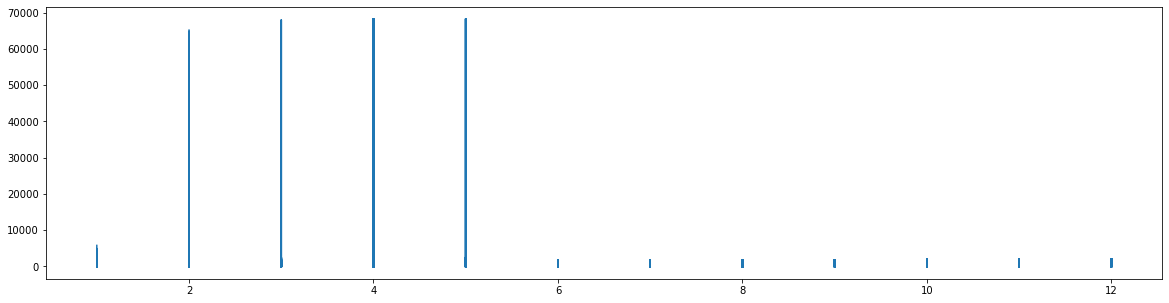

In [32]:
plt.figure(figsize=(20,5))
plt.plot(covid_df['Month'],covid_df['Confirmed'])
plt.show

# Ploting covid19 Data

In [33]:
covid_df['ObservationData'] = pd.to_datetime(covid_df['ObservationDate']).dt.normalize()
covid_df['Last Update'] = pd.to_datetime(covid_df['Last Update'])

In [34]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228329 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  datetime64[ns]
 5   Confirmed        306429 non-null  float64       
 6   Deaths           306429 non-null  float64       
 7   Recovered        306429 non-null  float64       
 8   Month            15758 non-null   float64       
 9   Day              15758 non-null   float64       
 10  ObservationData  306429 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(1), object(2)
memory usage: 25.7+ MB


In [35]:
covid_df.head(10)

SNo ObservationDate Province/State  Country/Region         Last Update  \
0    1      2020-01-22          Anhui  Mainland China 2020-01-22 17:00:00   
1    2      2020-01-22        Beijing  Mainland China 2020-01-22 17:00:00   
2    3      2020-01-22      Chongqing  Mainland China 2020-01-22 17:00:00   
3    4      2020-01-22         Fujian  Mainland China 2020-01-22 17:00:00   
4    5      2020-01-22          Gansu  Mainland China 2020-01-22 17:00:00   
5    6      2020-01-22      Guangdong  Mainland China 2020-01-22 17:00:00   
6    7      2020-01-22        Guangxi  Mainland China 2020-01-22 17:00:00   
7    8      2020-01-22        Guizhou  Mainland China 2020-01-22 17:00:00   
8    9      2020-01-22         Hainan  Mainland China 2020-01-22 17:00:00   
9   10      2020-01-22          Hebei  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  Month   Day ObservationData  
0        1.0     0.0        0.0    1.0  22.0      2020-01-22  
1       14.0     0.0        0.0    1.0  22.0      2020-01-22  
2        6.0     0.0        0.0    1.0  22.0      2020-01-22  
3        1.0     0.0        0.0    1.0  22.0      2020-01-22  
4        0.0     0.0        0.0    1.0  22.0      2020-01-22  
5       26.0     0.0        0.0    1.0  22.0      2020-01-22  
6        2.0     0.0        0.0    1.0  22.0      2020-01-22  
7        1.0     0.0        0.0    1.0  22.0      2020-01-22  
8        4.0     0.0        0.0    1.0  22.0      2020-01-22  
9        1.0     0.0        0.0    1.0  22.0      2020-01-22

In [36]:
covid_top_5 = covid_df.sort_values(by=['Confirmed'], ascending = False).head()
covid_top_5

SNo ObservationDate Province/State Country/Region  \
298068  298069      2021-05-19            NaN         France   
297303  297304      2021-05-18            NaN         France   
296538  296539      2021-05-17            NaN         France   
295773  295774      2021-05-16            NaN         France   
295008  295009      2021-05-15            NaN         France   

               Last Update  Confirmed    Deaths  Recovered  Month  Day  \
298068 2021-05-20 04:21:05  5863138.0  107390.0   324444.0    NaN  NaN   
297303 2021-05-19 04:20:42  5845010.0  107256.0   323205.0    NaN  NaN   
296538 2021-05-18 04:20:33  5829009.0  107041.0   321874.0    NaN  NaN   
295773 2021-05-17 04:20:34  5825659.0  106845.0   321026.0    NaN  NaN   
295008 2021-05-16 04:20:49  5811711.0  106764.0   320711.0    NaN  NaN   

       ObservationData  
298068      2021-05-19  
297303      2021-05-18  
296538      2021-05-17  
295773      2021-05-16  
295008      2021-05-15

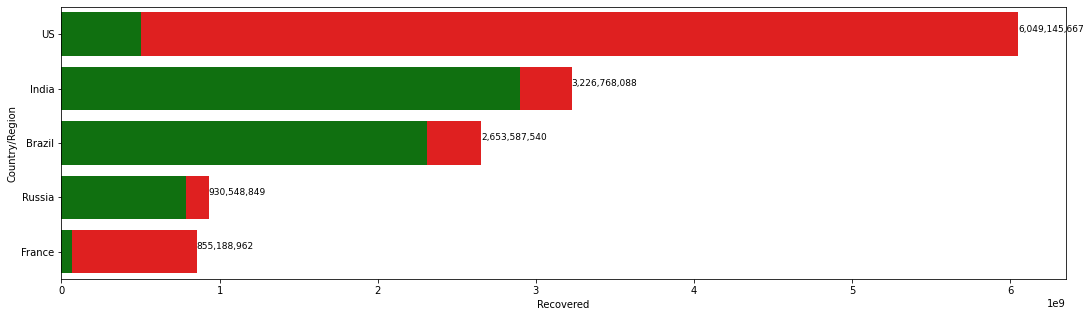

In [93]:
#barplot for showing confirmed vs recovered worldwide top 5 country's
plt.figure(figsize=(18,5))
confirmed=sns.barplot(covid_top_5['Confirmed'].head(),covid_top_5['Country/Region'], color='red' , label = 'Confirmed')
recovered=sns.barplot(covid_top_5['Recovered'].head(),covid_top_5['Country/Region'], color='green' , label = 'Recovered')
#adding text to plot
for i,(value,name) in enumerate(zip(covid_top_5['Confirmed'],covid_top_5['Country/Region'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)

<AxesSubplot:xlabel='Confirmed', ylabel='Recovered'>

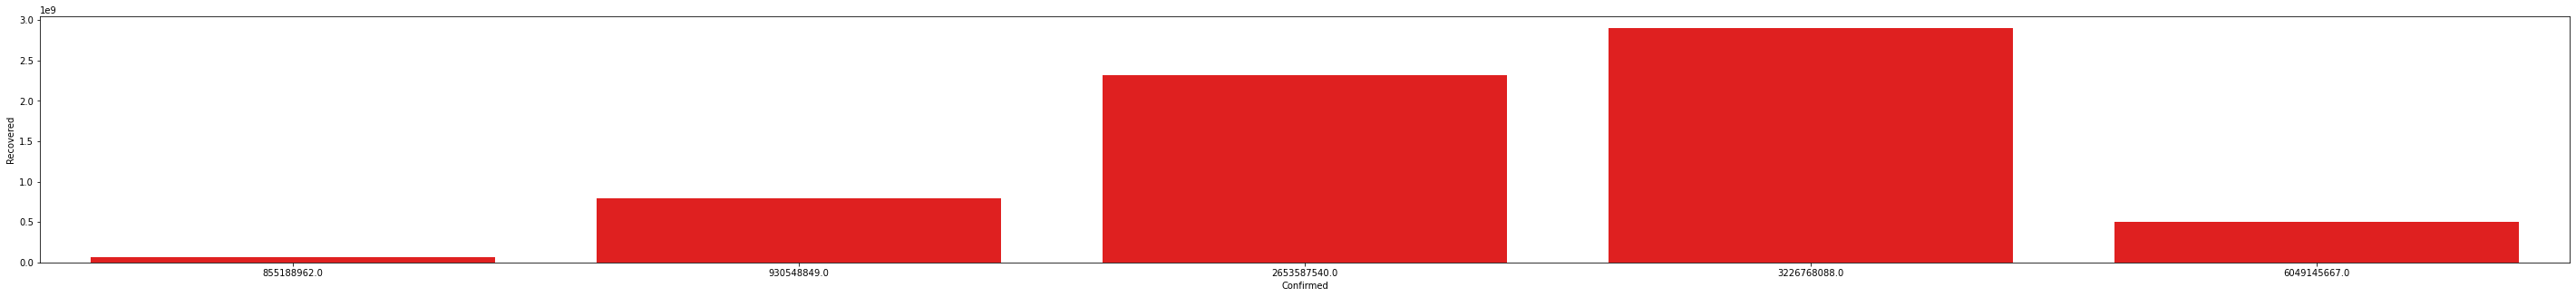

In [94]:
plt.figure(figsize=(50,5))
sns.barplot(covid_top_5['Confirmed'],covid_top_5['Recovered'], color= 'red' , label ='Confirmed')

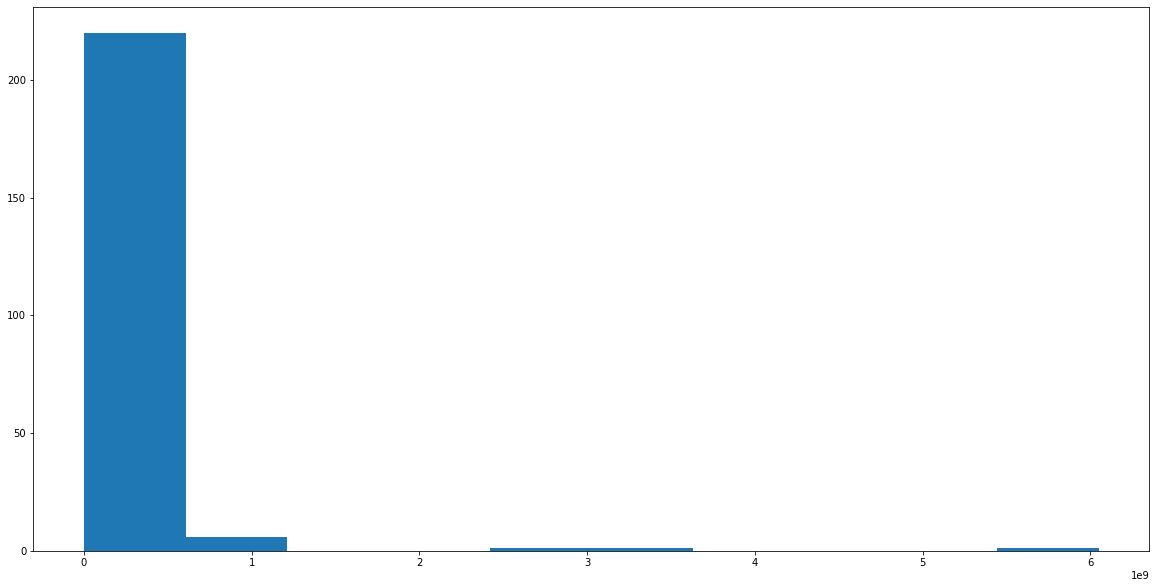

In [95]:
#histogram showing confirmed cases worldwide

plt.figure(figsize=(20,10))
plt.hist(covid_df["Confirmed"])
plt.show()

In [96]:
covid_df = covid_df.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().reset_index()
covid_df.head()

Country/Region   Confirmed    Deaths   Recovered
0       Azerbaijan         1.0       0.0         0.0
1  ('St. Martin',)         2.0       0.0         0.0
2      Afghanistan  17026442.0  669075.0  13464399.0
3          Albania  19768869.0  375955.0  13945256.0
4          Algeria  27684358.0  834464.0  18959299.0

In [97]:
covid_top_5 = covid_df.sort_values(by=['Confirmed'], ascending = False).head()
covid_top_5

Country/Region     Confirmed       Deaths     Recovered
214             US  6.049146e+09  123303762.0  5.033710e+08
96           India  3.226768e+09   44424723.0  2.900590e+09
27          Brazil  2.653588e+09   72624610.0  2.313677e+09
172         Russia  9.305488e+08   18363719.0  7.907057e+08
71          France  8.551890e+08   22720818.0  6.940743e+07

In [98]:
#statistical description of data
covid_df.describe()

Confirmed        Deaths     Recovered
count  2.290000e+02  2.290000e+02  2.290000e+02
mean   1.146378e+08  2.724948e+06  6.746829e+07
std    4.992496e+08  1.087101e+07  2.634108e+08
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.644640e+05  4.305000e+03  2.626010e+05
50%    6.148539e+06  9.060000e+04  3.797948e+06
75%    5.016817e+07  8.344640e+05  3.710158e+07
max    6.049146e+09  1.233038e+08  2.900590e+09

In [99]:
#statistical descinclude='object'
covid_df.describe(include='object')

Country/Region
count             229
unique            229
top        Azerbaijan
freq                1

In [100]:
covid_df.isnull().sum()

Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [101]:
covid_df.shape

(229, 4)

In [102]:
covid_df.describe(include='object')

Country/Region
count             229
unique            229
top        Azerbaijan
freq                1

In [103]:
covid_df.head()

Country/Region   Confirmed    Deaths   Recovered
0       Azerbaijan         1.0       0.0         0.0
1  ('St. Martin',)         2.0       0.0         0.0
2      Afghanistan  17026442.0  669075.0  13464399.0
3          Albania  19768869.0  375955.0  13945256.0
4          Algeria  27684358.0  834464.0  18959299.0

In [104]:
covid_df['Country/Region']

0                          Azerbaijan
1                     ('St. Martin',)
2                         Afghanistan
3                             Albania
4                             Algeria
                    ...              
224                West Bank and Gaza
225                             Yemen
226                            Zambia
227                          Zimbabwe
228    occupied Palestinian territory
Name: Country/Region, Length: 229, dtype: object

In [105]:
covid_df.min()

Country/Region     Azerbaijan
Confirmed                 0.0
Deaths                    0.0
Recovered                 0.0
dtype: object

In [106]:
covid_df.max()

Country/Region    occupied Palestinian territory
Confirmed                           6049145667.0
Deaths                               123303762.0
Recovered                           2900589824.0
dtype: object

In [107]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  229 non-null    object 
 1   Confirmed       229 non-null    float64
 2   Deaths          229 non-null    float64
 3   Recovered       229 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.3+ KB


In [108]:
covid_df['Confirmed'].sum()

26252051758.0

In [109]:
Country_count=covid_df['Country/Region'].value_counts().sort_values(ascending= False)
Country_count=Country_count.to_frame()

Country_count.columns= ['Total Records']
Country_count.head()

Total Records
 Azerbaijan              1
Kyrgyzstan               1
Afghanistan              1
Albania                  1
Algeria                  1

In [110]:
# Country/Regionwise case count

Country_count=covid_df['Country/Region'].value_counts().sort_values(ascending= False)
Country_count=Country_count.to_frame()

Country_count.columns=['Total Records']
Country_count_10=Country_count.head(10)

In [111]:
Country_count_10.index

Index([' Azerbaijan', 'Kyrgyzstan', 'Afghanistan', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Total Records'}>]], dtype=object)

<Figure size 1440x576 with 0 Axes>

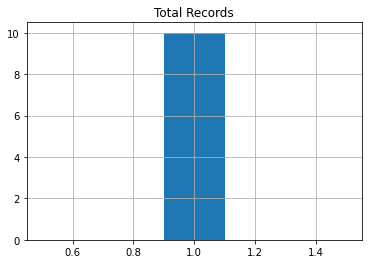

In [113]:
# how many countries reached total record count.
plt.figure(figsize=(20,8))
Country_count_10.hist(bins=5)

<AxesSubplot:>

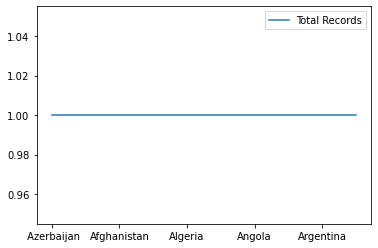

In [114]:
Country_count_10.plot()

In [115]:
len(covid_df['Country/Region'].unique())

229

In [116]:
#largest case value in this data set.
covid_df.iloc[:,4:].max()

Series([], dtype: float64)

In [117]:
covid_df.duplicated().sum()

0

In [118]:
covid_df['Confirmed'].sum()

26252051758.0

In [119]:
covid_df['Deaths'].sum()

624013017.0

In [120]:
covid_df['Recovered'].sum()

15450237912.0

In [121]:
#country/region names from a column
covid_df['Country/Region'].unique()

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethi

# Time series data

# Notebook covers:
### Data loading
### Data Cleaning and Preparation
### Visualising N number of worst hit countries using plotly scatter plot.
### Plotting confirmed and death cases for the requested country.
### Plotting all cases on world map using Folium
### COVID-19: Progression of spread (Animation)
### Visualizing covid19 worlwide scenario on Calender Maps

In [122]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [123]:


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
import folium

In [124]:
# loading data right from the source: John hopkins github repo
death_df = pd.read_csv('time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('cases_country.csv')



In [125]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/4/22  6/5/22  6/6/22  6/7/22  \
0        0        0        0        0  ...  180615  180615  180688  180741   
1        0        0        0        0  ...  276342  276401  276415  276468   
2        0        0        0        0  ...  265889  265897  265900  265904   
3        0        0        0        0  ...   43067   43067   43067   43067   
4        0        0        0        0  ...   99761   99761   99761   99761   

   6/8/22  6/9/22  6/10/22  6/11/22  6/12/22  6/13/22  
0  180784  180864   180864   180864   180864   181120  
1  276518  276583   276638   276690   276731   276731  
2  265909  265920   265925   265925   265927   265937  
3   43224   43224    43224    43224    43224    43224  
4   99761   99761    99761    99761    99761    99761  

[5 rows x 878 columns]

In [126]:
recovered_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/4/22  6/5/22  6/6/22  6/7/22  \
0        0        0        0        0  ...       0       0       0       0   
1        0        0        0        0  ...       0       0       0       0   
2        0        0        0        0  ...       0       0       0       0   
3        0        0        0        0  ...       0       0       0       0   
4        0        0        0        0  ...       0       0       0       0   

   6/8/22  6/9/22  6/10/22  6/11/22  6/12/22  6/13/22  
0       0       0        0        0        0        0  
1       0       0        0        0        0        0  
2       0       0        0        0        0        0  
3       0       0        0        0        0        0  
4       0       0        0        0        0        0  

[5 rows x 878 columns]

In [127]:
death_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/4/22  6/5/22  6/6/22  6/7/22  \
0        0        0        0        0  ...    7708    7708    7709    7709   
1        0        0        0        0  ...    3497    3497    3497    3497   
2        0        0        0        0  ...    6875    6875    6875    6875   
3        0        0        0        0  ...     153     153     153     153   
4        0        0        0        0  ...    1900    1900    1900    1900   

   6/8/22  6/9/22  6/10/22  6/11/22  6/12/22  6/13/22  
0    7709    7709     7709     7709     7709     7710  
1    3497    3497     3497     3497     3497     3497  
2    6875    6875     6875     6875     6875     6875  
3     153     153      153      153      153      153  
4    1900    1900     1900     1900     1900     1900  

[5 rows x 878 columns]

In [128]:
country_df.head()

Country_Region          Last_Update       Lat      Long_  Confirmed  Deaths  \
0    Afghanistan  2022-06-14 13:20:59  33.93911  67.709953     181120    7710   
1        Albania  2022-06-14 13:20:59  41.15330  20.168300     276731    3497   
2        Algeria  2022-06-14 13:20:59  28.03390   1.659600     265937    6875   
3        Andorra  2022-06-14 13:20:59  42.50630   1.521800      43224     153   
4         Angola  2022-06-14 13:20:59 -11.20270  17.873900      99761    1900   

   Recovered  Active  Incident_Rate  People_Tested  People_Hospitalized  \
0        NaN     NaN     465.265139            NaN                  NaN   
1        NaN     NaN    9616.060880            NaN                  NaN   
2        NaN     NaN     606.455358            NaN                  NaN   
3        NaN     NaN   55942.535430            NaN                  NaN   
4        NaN     NaN     303.536136            NaN                  NaN   

   Mortality_Rate  UID ISO3  Cases_28_Days  Deaths_28_Days  
0        4.256846    4  AFG           1799              19  
1        1.263682    8  ALB           1110               0  
2        2.585199   12  DZA            114               0  
3        0.353970   20  AND           1068               0  
4        1.904552   24  AGO            474               0

In [129]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
country_df.head()

country          last_update       lat      long_  confirmed  deaths  \
0  Afghanistan  2022-06-14 13:20:59  33.93911  67.709953     181120    7710   
1      Albania  2022-06-14 13:20:59  41.15330  20.168300     276731    3497   
2      Algeria  2022-06-14 13:20:59  28.03390   1.659600     265937    6875   
3      Andorra  2022-06-14 13:20:59  42.50630   1.521800      43224     153   
4       Angola  2022-06-14 13:20:59 -11.20270  17.873900      99761    1900   

   recovered  active  incident_rate  people_tested  people_hospitalized  \
0        NaN     NaN     465.265139            NaN                  NaN   
1        NaN     NaN    9616.060880            NaN                  NaN   
2        NaN     NaN     606.455358            NaN                  NaN   
3        NaN     NaN   55942.535430            NaN                  NaN   
4        NaN     NaN     303.536136            NaN                  NaN   

   mortality_rate  uid iso3  cases_28_days  deaths_28_days  
0        4.256846    4  AFG           1799              19  
1        1.263682    8  ALB           1110               0  
2        2.585199   12  DZA            114               0  
3        0.353970   20  AND           1068               0  
4        1.904552   24  AGO            474               0

In [130]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [131]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

 # COVID-19 Confirmed/Death/Recovered cases by countries

## Enter number of countries you want the data for

In [132]:
# sorting the values by confirmed descednding order
#country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
#ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [133]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

In [134]:
fig = px.scatter(sorted_country_df.head(10), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
fig.update_layout(
    title=str(10) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
fig.show();


 # Slide to check for the worst hit countries

In [135]:
# # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=str(n) +" Worst hit countries",
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
    width = 700
    )
    fig.show();

#interact(bubble_chart, n=10)
#ipywLayout = widgets.Layout(border='solid 2px green')
#ipywLayout.display='none'
#widgets.VBox([fig], layout=ipywLayout)

In [136]:


def plot_cases_of_a_country(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]
    
    df_list = [confirmed_df, death_df]
    
    fig = go.Figure();
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
            
        else:    
            x_data = np.array(list(df.iloc[:, 20:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:,20:]),axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines+markers',
        name=labels[i],
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
        text = "Total " + str(labels[i]) +": "+ str(y_data[-1])
        ));
    
    fig.update_layout(
        title="COVID 19 cases of " + country,
        xaxis_title='Date',
        yaxis_title='No. of Confirmed Cases',
        margin=dict(l=20, r=20, t=40, b=20),
        paper_bgcolor="lightgrey",
        width = 800,
        
    );
    
    fig.update_yaxes(type="linear")
    fig.show();
plot_cases_of_a_country('World')

In [137]:
plot_cases_of_a_country('India')

In [138]:
plot_cases_of_a_country('US')

# Check the details of any country or the World

* Enter the name of your country(in capitalized format(e.g. Italy)) and world for total cases

# 10 worst hit countries - Confirmed cases

In [139]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# 10 worst hit countries - Death cases

In [140]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

# Worst hit countries - Recovering cases

In [141]:
px.bar(
    sorted_country_df.head(10),
    x = "country",
    y = "recovered",
    title= "Top 10 worst affected countries", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

## COVID-19: Progression of spread

In [142]:
pip install pycountry_convert

Note: you may need to restart the kernel to use updated packages.


In [143]:
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [144]:
data = pd.read_csv(r'covid_19_dataL.csv')
data.rename(columns = {'Last Update':'last_update'}, inplace = True)
d1 = data.groupby(['last_update', 'Country/Region'])['Confirmed', 'Deaths'].max().reset_index().fillna(0)
d1["last_update"] = pd.to_datetime( d1["last_update"]).dt.strftime('%m/%d/%Y')
#print(d1.head())
fig = px.scatter_geo(d1, locations="Country/Region", locationmode='country names', 
                     color=np.power(d1["Confirmed"],0.3)-2 , size= np.power(d1["Confirmed"]+1,0.3)-1, hover_name="Country/Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(d1["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="last_update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [145]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data = data.set_index('ObservationDate')
data.head()

SNo Province/State  Country/Region      last_update  \
ObservationDate                                                        
2020-01-22         1          Anhui  Mainland China  1/22/2020 17:00   
2020-01-22         2        Beijing  Mainland China  1/22/2020 17:00   
2020-01-22         3      Chongqing  Mainland China  1/22/2020 17:00   
2020-01-22         4         Fujian  Mainland China  1/22/2020 17:00   
2020-01-22         5          Gansu  Mainland China  1/22/2020 17:00   

                 Confirmed  Deaths  Recovered  
ObservationDate                                
2020-01-22             1.0     0.0        0.0  
2020-01-22            14.0     0.0        0.0  
2020-01-22             6.0     0.0        0.0  
2020-01-22             1.0     0.0        0.0  
2020-01-22             0.0     0.0        0.0

## Plotting worldwide scenario on Calender maps

In [146]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

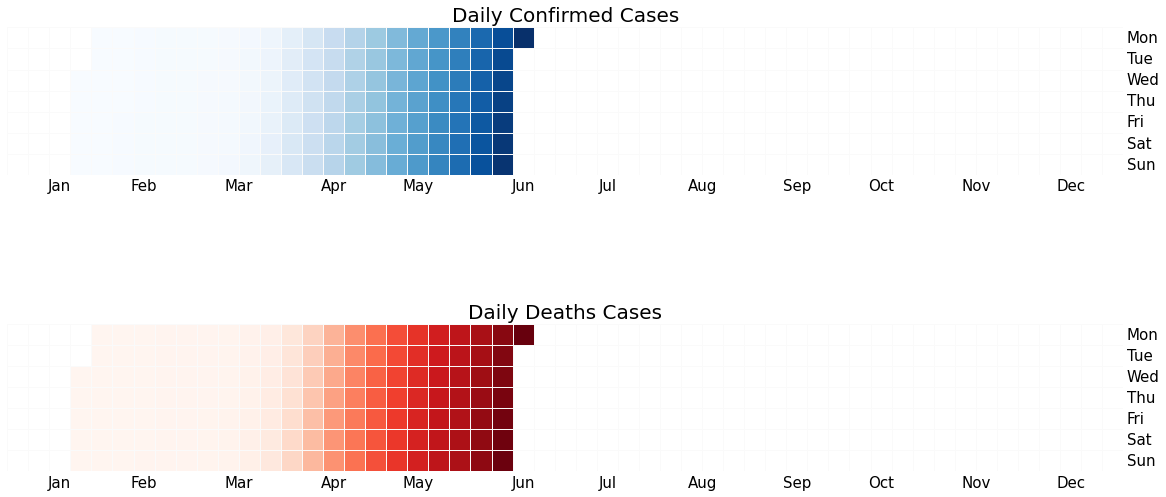

In [148]:
f = plt.figure(figsize=(20,10))
f.add_subplot(2,1,1)
calmap.yearplot(data['Confirmed'], fillcolor='white', cmap='Blues', linewidth=0.5,linecolor="#fafafa",monthlabels=["J","F","M","A","M","J","J","A","S","O","N","D"])
plt.title("Daily Confirmed Cases",fontsize=20)
plt.tick_params(labelsize=15)

f.add_subplot(2,1,2)
calmap.yearplot(data['Deaths'], fillcolor='white', cmap='Reds', linewidth=1,linecolor="#fafafa",year=2020,)
plt.title("Daily Deaths Cases",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

## Symptoms:
People may be sick with the virus for 1 to 14 days before developing symptoms. The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, and dry cough. Most people (about 80%) recover from the disease without needing special treatment.
* cough
* fever
* tiredness
* difficulty in breathing(severe cases)




# INDIA CORONA VIRUS CASES


In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [150]:
df_India= pd.read_csv('covid_19_India.csv')
India_coord = pd.read_excel('Indian Coordinates.xlsx')
#guys i will send you these files and these are 
#the file you have to use for your project

In [151]:
print(df_India.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2450 non-null   int64 
 1   Date                      2450 non-null   object
 2   Time                      2450 non-null   object
 3   State/UnionTerritory      2450 non-null   object
 4   ConfirmedIndianNational   2450 non-null   object
 5   ConfirmedForeignNational  2450 non-null   object
 6   Cured                     2450 non-null   int64 
 7   Deaths                    2450 non-null   int64 
 8   Confirmed                 2450 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 172.4+ KB
None


In [152]:
df_India.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [153]:
df_India.tail()


Sno      Date     Time              State/UnionTerritory  \
2445  2446  29/05/20  8:00 AM                           Tripura   
2446  2447  29/05/20  8:00 AM                       Uttarakhand   
2447  2448  29/05/20  8:00 AM                     Uttar Pradesh   
2448  2449  29/05/20  8:00 AM                       West Bengal   
2449  2450  29/05/20  8:00 AM  Cases being reassigned to states   

     ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
2445                       -                        -    165       0   
2446                       -                        -     79       4   
2447                       -                        -   3991     182   
2448                       -                        -   1578     289   
2449                       -                        -      0       0   

      Confirmed  
2445        230  
2446        469  
2447       6991  
2448       4192  
2449       4332

In [154]:
df_India.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [155]:
print(India_coord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name of State / UT  35 non-null     object 
 1   Latitude            35 non-null     float64
 2   Longitude           35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes
None


In [156]:
India_coord.head()

Name of State / UT   Latitude  Longitude
0  Andaman And Nicobar   11.667026  92.735983
1        Andhra Pradesh  14.750429  78.570026
2    Arunachal Pradesh   27.100399  93.616601
3                Assam   26.749981  94.216667
4                Bihar   25.785414  87.479973

In [157]:
def replace_dash_with_zeros(inp):
    return int(inp.replace("-","0"))

df_India.drop(['Sno'],axis=1,inplace=True)
df_India['Date'] = pd.to_datetime(df_India['Date'], format = "%d/%m/%y")
# https://www.stat.berkeley.edu/~s133/dates.html
df_India['ConfirmedIndianNational'] = df_India['ConfirmedIndianNational'].apply(replace_dash_with_zeros)
df_India['ConfirmedForeignNational'] = df_India['ConfirmedForeignNational'].apply(replace_dash_with_zeros)
df_India.sort_values("Confirmed", ascending = False, inplace = True)
df_India

Date     Time State/UnionTerritory  ConfirmedIndianNational  \
2397 2020-05-28  8:00 AM          Maharashtra                        0   
2433 2020-05-29  8:00 AM          Maharashtra                        0   
2361 2020-05-27  8:00 AM          Maharashtra                        0   
2325 2020-05-26  8:00 AM          Maharashtra                        0   
2290 2020-05-25  8:00 AM          Maharashtra                        0   
...         ...      ...                  ...                      ...   
1047 2020-04-17  5:00 PM             Nagaland                        0   
1179 2020-04-21  5:00 PM             Nagaland                        0   
981  2020-04-15  5:00 PM             Nagaland                        0   
1113 2020-04-19  5:00 PM             Nagaland                        0   
1014 2020-04-16  5:00 PM             Nagaland                        0   

      ConfirmedForeignNational  Cured  Deaths  Confirmed  
2397                         0  17918    1897      56948  
2433                         0  17918    1897      56948  
2361                         0  16954    1792      54758  
2325                         0  15786    1695      52667  
2290                         0  14600    1635      50231  
...                        ...    ...     ...        ...  
1047                         0      0       0          0  
1179                         0      0       0          0  
981                          0      0       0          0  
1113                         0      0       0          0  
1014                         0      0       0          0  

[2450 rows x 8 columns]

In [158]:
df_India.loc[df_India["ConfirmedForeignNational"] == "-",:]

Empty DataFrame
Columns: [Date, Time, State/UnionTerritory, ConfirmedIndianNational, ConfirmedForeignNational, Cured, Deaths, Confirmed]
Index: []

In [159]:
list(zip(df_India.columns,df_India.dtypes,df_India.isna().sum()))

[('Date', dtype('<M8[ns]'), 0),
 ('Time', dtype('O'), 0),
 ('State/UnionTerritory', dtype('O'), 0),
 ('ConfirmedIndianNational', dtype('int64'), 0),
 ('ConfirmedForeignNational', dtype('int64'), 0),
 ('Cured', dtype('int64'), 0),
 ('Deaths', dtype('int64'), 0),
 ('Confirmed', dtype('int64'), 0)]

In [160]:
print(f'We have data available from : {df_India.Date.min()} to {df_India.Date.max()}')

We have data available from : 2020-01-30 00:00:00 to 2020-05-29 00:00:00


In [161]:
df_India.groupby(["State/UnionTerritory", "Date"]).sum()

ConfirmedIndianNational  \
State/UnionTerritory        Date                                  
Andaman and Nicobar Islands 2020-03-26                        1   
                            2020-03-27                        1   
                            2020-03-28                        6   
                            2020-03-29                        0   
                            2020-03-30                        0   
...                                                         ...   
West Bengal                 2020-05-25                        0   
                            2020-05-26                        0   
                            2020-05-27                        0   
                            2020-05-28                        0   
                            2020-05-29                        0   

                                        ConfirmedForeignNational  Cured  \
State/UnionTerritory        Date                                          
Andaman and Nicobar Islands 2020-03-26                         0      0   
                            2020-03-27                         0      0   
                            2020-03-28                         0      0   
                            2020-03-29                         0      0   
                            2020-03-30                         0      0   
...                                                          ...    ...   
West Bengal                 2020-05-25                         0   1339   
                            2020-05-26                         0   1414   
                            2020-05-27                         0   1486   
                            2020-05-28                         0   1578   
                            2020-05-29                         0   1578   

                                        Deaths  Confirmed  
State/UnionTerritory        Date                           
Andaman and Nicobar Islands 2020-03-26       0          1  
                            2020-03-27       0          1  
                            2020-03-28       0          6  
                            2020-03-29       0          9  
                            2020-03-30       0          9  
...                                        ...        ...  
West Bengal                 2020-05-25     272       3667  
                            2020-05-26     278       3816  
                            2020-05-27     283       4009  
                            2020-05-28     289       4192  
                            2020-05-29     289       4192  

[2450 rows x 5 columns]

In [162]:
States = df_India['State/UnionTerritory'].unique().tolist()
States

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'Cases being reassigned to states',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Unassigned',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [163]:
len(States)

37

## Merging Data Frames

In [164]:
df_final_India = pd.DataFrame()
dates = pd.DataFrame({"Date": pd.date_range(df_India.Date.min(),df_India.Date.max())})
for state in States:
    all_dates_df = pd.merge(dates, 
                            df_India.loc[df_India['State/UnionTerritory'] == state,:], on = "Date",
                           how = "left")
    all_dates_df['State/UnionTerritory'] = state
    all_dates_df = all_dates_df.fillna(0)
    all_dates_df['New Cases'] = all_dates_df['Confirmed'] - all_dates_df['Confirmed'].shift(1)
#     print(state)
#     display(all_dates_df.loc[all_dates_df['New Cases'] <  0,:])
    df_final_India = pd.concat([df_final_India, all_dates_df],axis = 0)
print("Finally we have a data of Size: ",df_final_India.shape)
df_final_India.head()

Finally we have a data of Size:  (4477, 9)


Date Time State/UnionTerritory  ConfirmedIndianNational  \
0 2020-01-30    0          Maharashtra                      0.0   
1 2020-01-31    0          Maharashtra                      0.0   
2 2020-02-01    0          Maharashtra                      0.0   
3 2020-02-02    0          Maharashtra                      0.0   
4 2020-02-03    0          Maharashtra                      0.0   

   ConfirmedForeignNational  Cured  Deaths  Confirmed  New Cases  
0                       0.0    0.0     0.0        0.0        NaN  
1                       0.0    0.0     0.0        0.0        0.0  
2                       0.0    0.0     0.0        0.0        0.0  
3                       0.0    0.0     0.0        0.0        0.0  
4                       0.0    0.0     0.0        0.0        0.0

In [165]:
df_final_India.shape


(4477, 9)

In [166]:
del df_final_India['Time']
del df_final_India['ConfirmedIndianNational']
del df_final_India['ConfirmedForeignNational']

In [167]:
df_final_India

Date State/UnionTerritory  Cured  Deaths  Confirmed  New Cases
0   2020-01-30          Maharashtra    0.0     0.0        0.0        NaN
1   2020-01-31          Maharashtra    0.0     0.0        0.0        0.0
2   2020-02-01          Maharashtra    0.0     0.0        0.0        0.0
3   2020-02-02          Maharashtra    0.0     0.0        0.0        0.0
4   2020-02-03          Maharashtra    0.0     0.0        0.0        0.0
..         ...                  ...    ...     ...        ...        ...
116 2020-05-25              Mizoram    1.0     0.0        1.0        0.0
117 2020-05-26              Mizoram    1.0     0.0        1.0        0.0
118 2020-05-27              Mizoram    1.0     0.0        1.0        0.0
119 2020-05-28              Mizoram    1.0     0.0        1.0        0.0
120 2020-05-29              Mizoram    1.0     0.0        1.0        0.0

[4477 rows x 6 columns]

In [168]:
df_final_India.groupby(["State/UnionTerritory", "Date"]).sum()

Cured  Deaths  Confirmed  New Cases
State/UnionTerritory        Date                                            
Andaman and Nicobar Islands 2020-01-30     0.0     0.0        0.0        0.0
                            2020-01-31     0.0     0.0        0.0        0.0
                            2020-02-01     0.0     0.0        0.0        0.0
                            2020-02-02     0.0     0.0        0.0        0.0
                            2020-02-03     0.0     0.0        0.0        0.0
...                                        ...     ...        ...        ...
West Bengal                 2020-05-25  1339.0   272.0     3667.0      208.0
                            2020-05-26  1414.0   278.0     3816.0      149.0
                            2020-05-27  1486.0   283.0     4009.0      193.0
                            2020-05-28  1578.0   289.0     4192.0      183.0
                            2020-05-29  1578.0   289.0     4192.0        0.0

[4477 rows x 4 columns]

In [169]:
df_final_India = df_final_India.groupby(["State/UnionTerritory", "Date"]).sum().reset_index()
df_final_India

State/UnionTerritory       Date   Cured  Deaths  Confirmed  \
0     Andaman and Nicobar Islands 2020-01-30     0.0     0.0        0.0   
1     Andaman and Nicobar Islands 2020-01-31     0.0     0.0        0.0   
2     Andaman and Nicobar Islands 2020-02-01     0.0     0.0        0.0   
3     Andaman and Nicobar Islands 2020-02-02     0.0     0.0        0.0   
4     Andaman and Nicobar Islands 2020-02-03     0.0     0.0        0.0   
...                           ...        ...     ...     ...        ...   
4472                  West Bengal 2020-05-25  1339.0   272.0     3667.0   
4473                  West Bengal 2020-05-26  1414.0   278.0     3816.0   
4474                  West Bengal 2020-05-27  1486.0   283.0     4009.0   
4475                  West Bengal 2020-05-28  1578.0   289.0     4192.0   
4476                  West Bengal 2020-05-29  1578.0   289.0     4192.0   

      New Cases  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
4472      208.0  
4473      149.0  
4474      193.0  
4475      183.0  
4476        0.0  

[4477 rows x 6 columns]

## Statewise Covid19 Status in India

In [170]:
def plot_pie(active,cured,death,title):
    labels = ['Active','Recovered','Died']
    sizes = [active,cured,death]
    color= ['#66b3ff','green','red']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title +  'COVID-19 Cases',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()

ValueError: cannot convert float NaN to integer

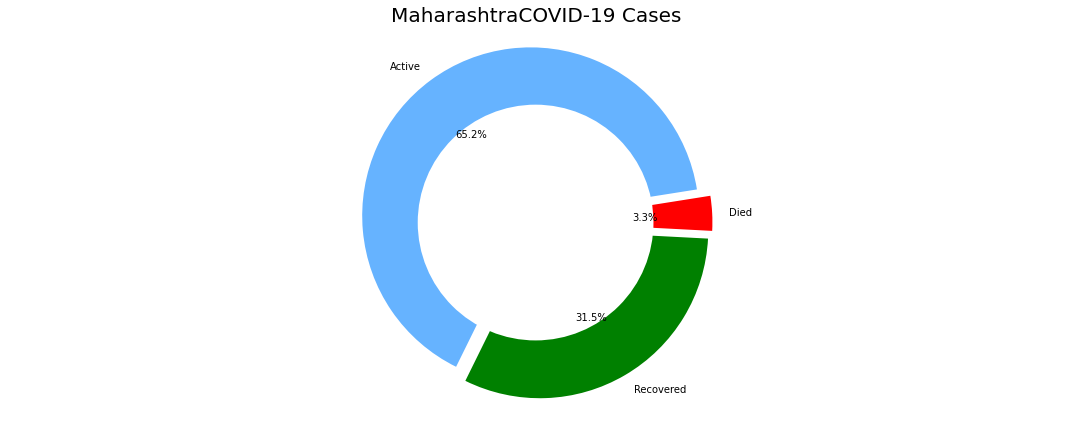

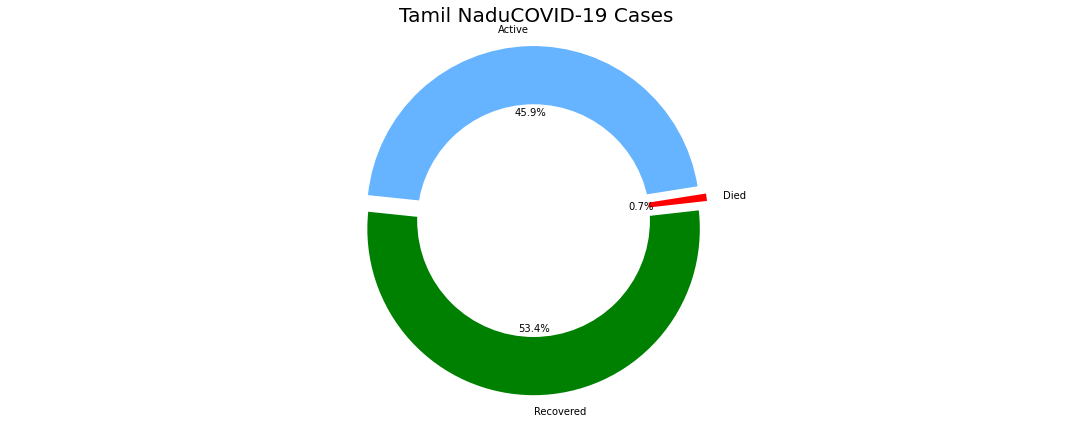

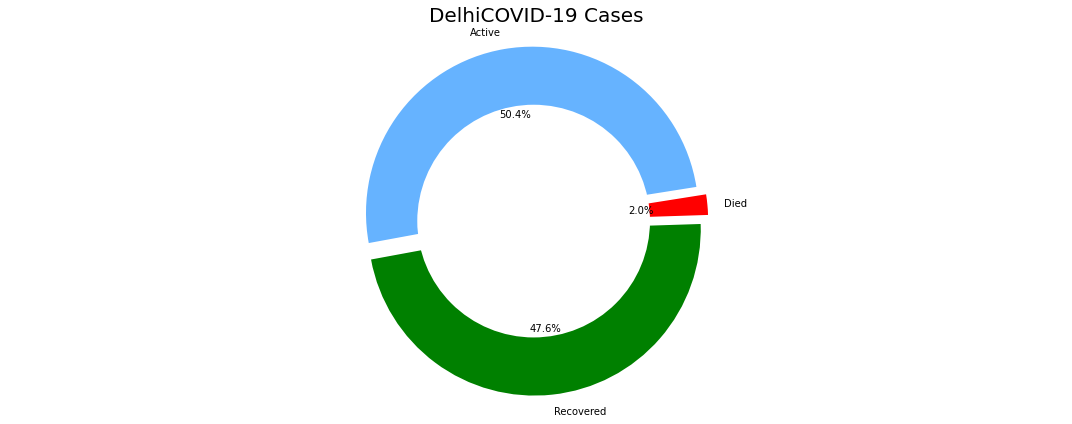

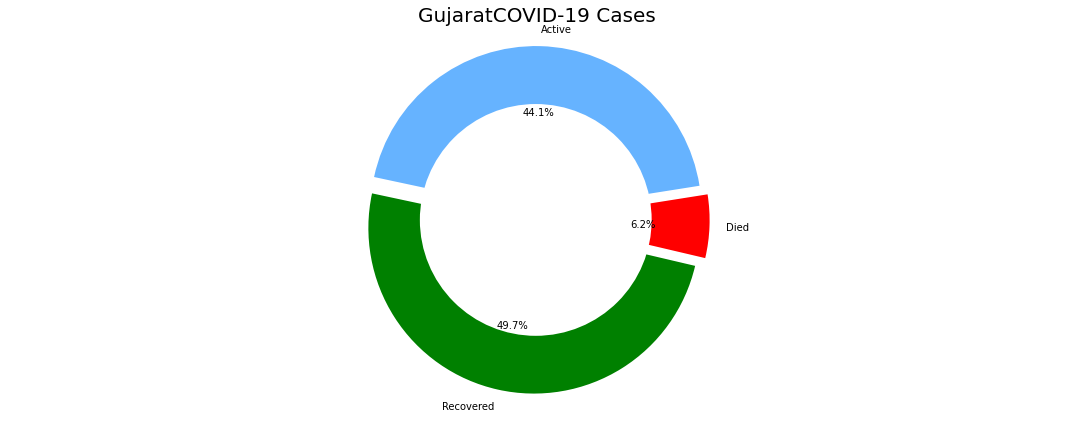

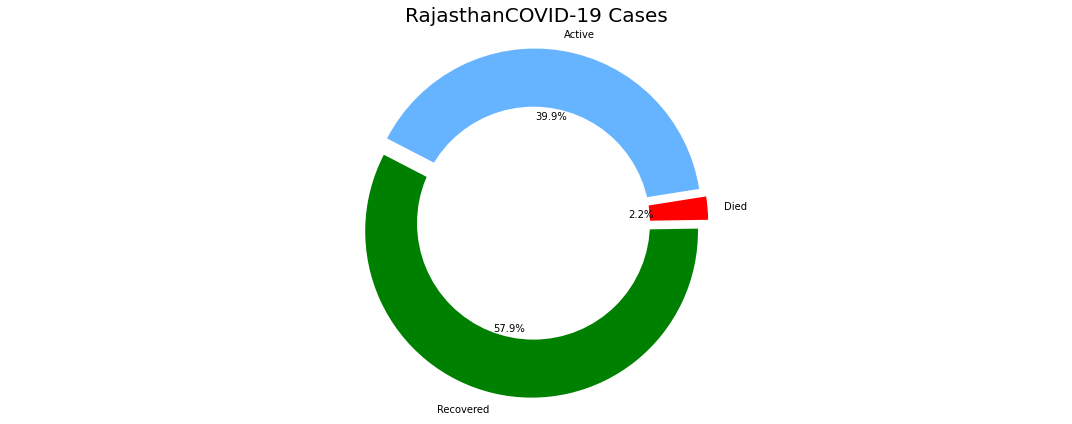

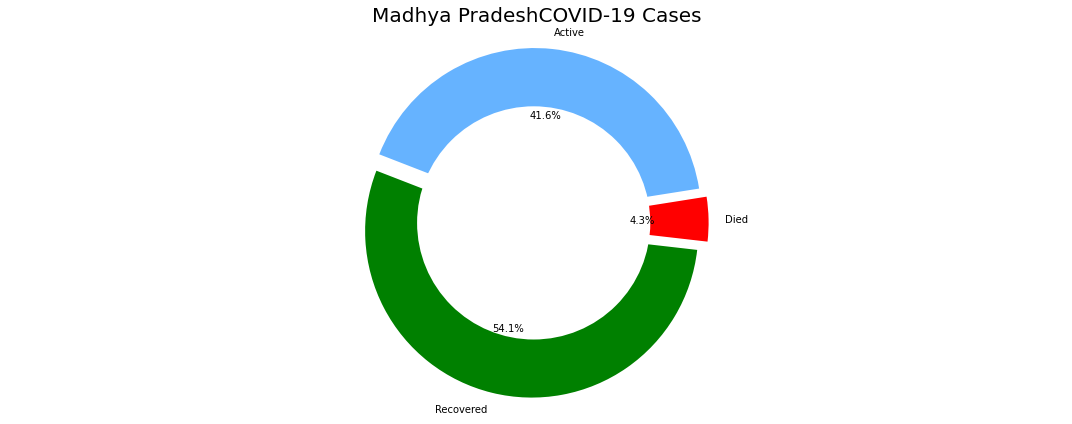

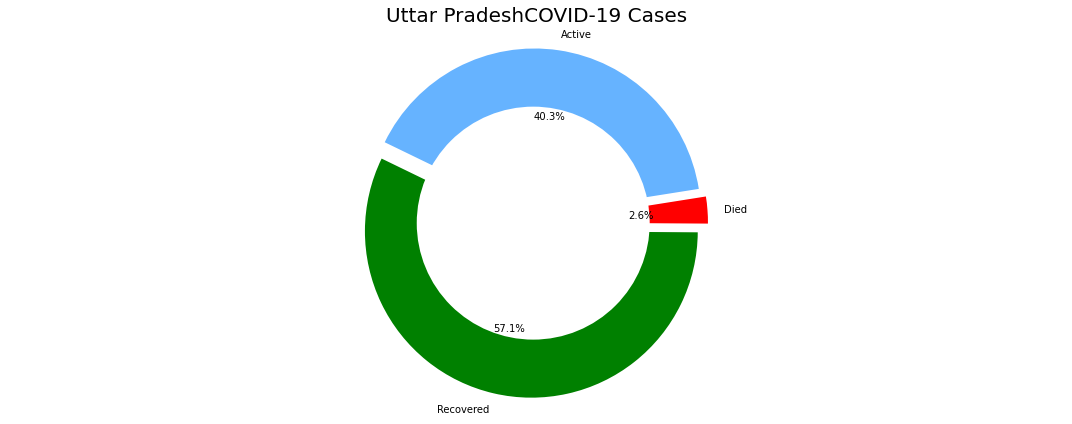

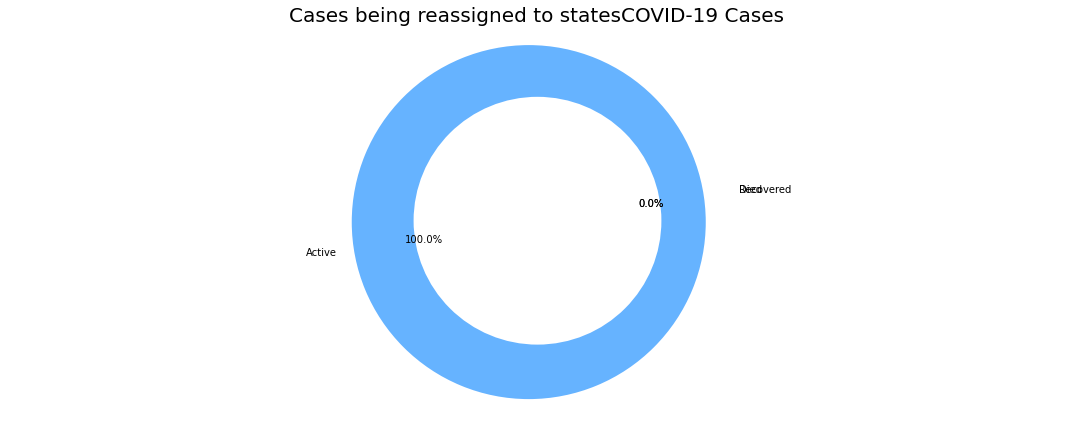

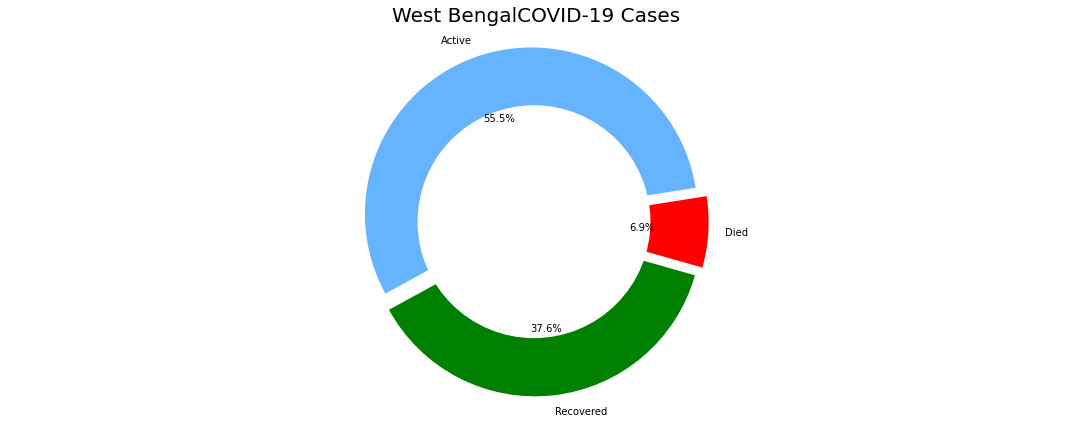

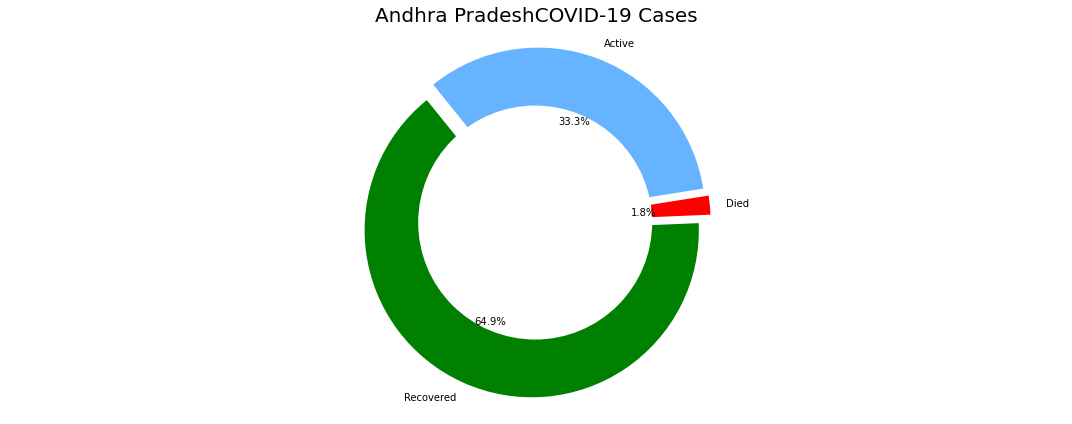

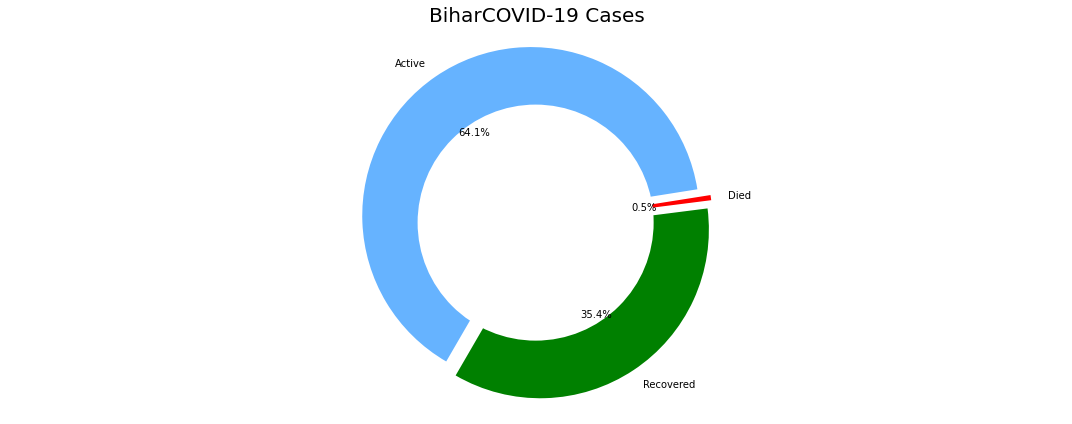

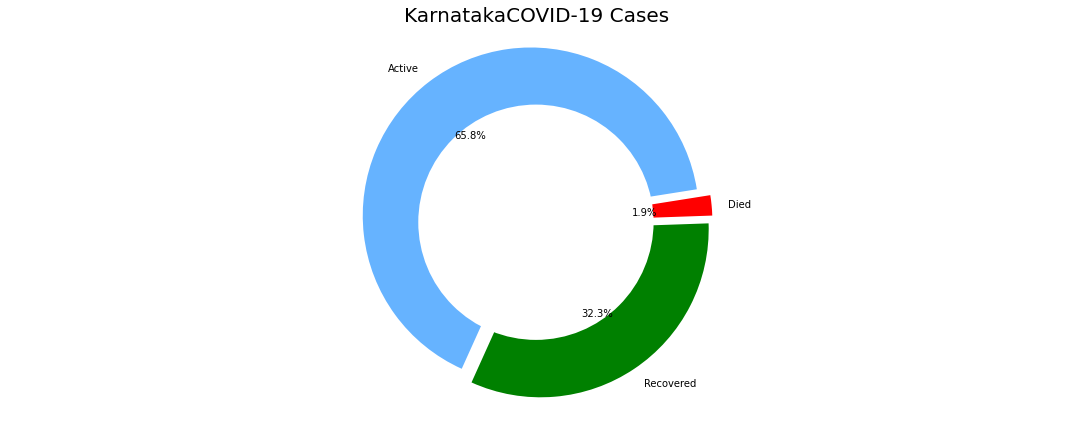

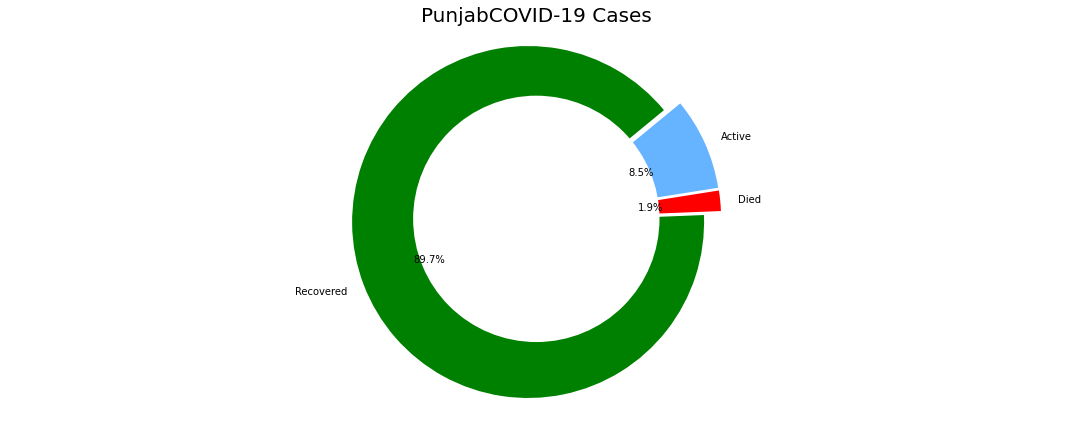

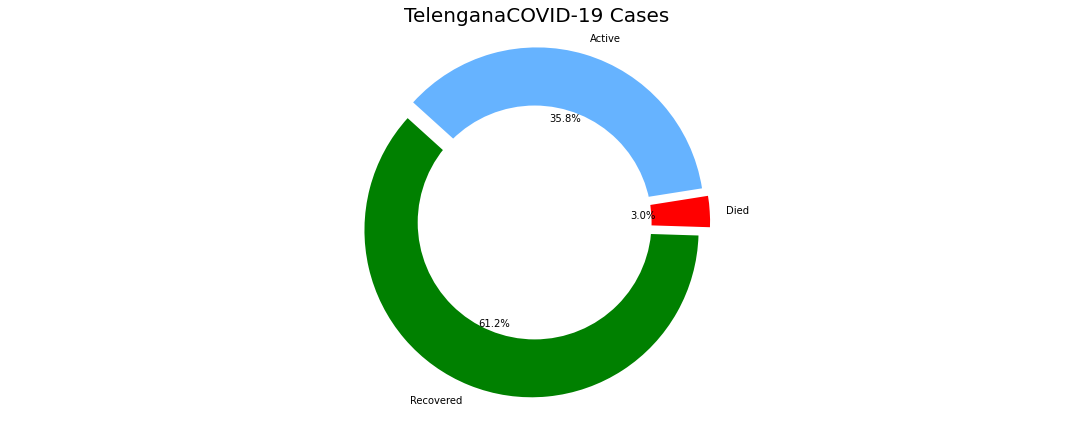

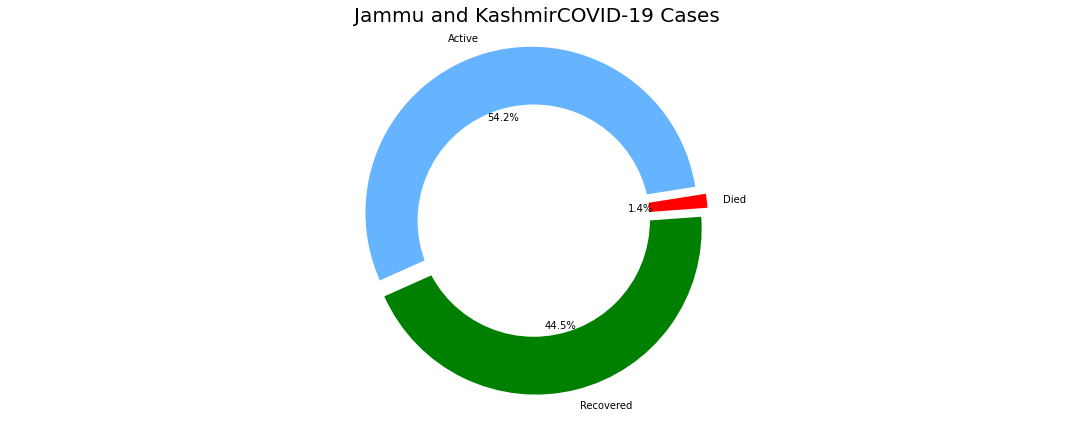

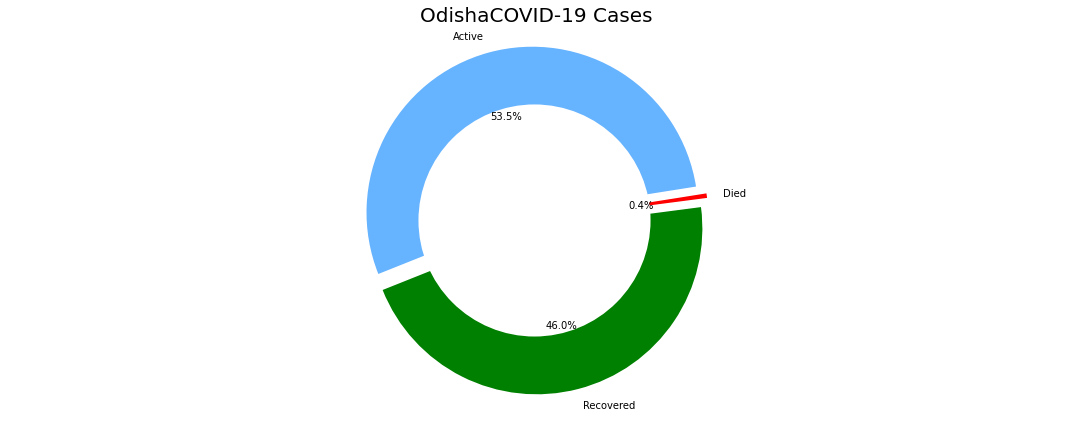

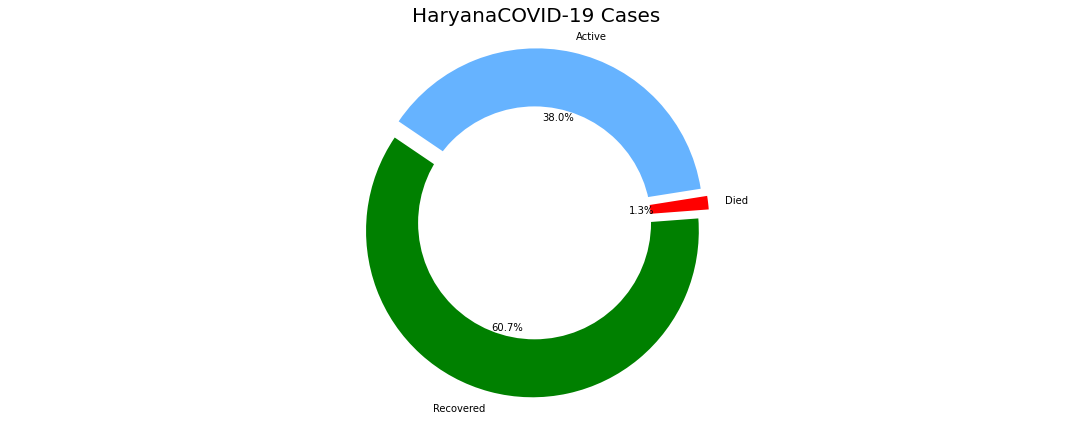

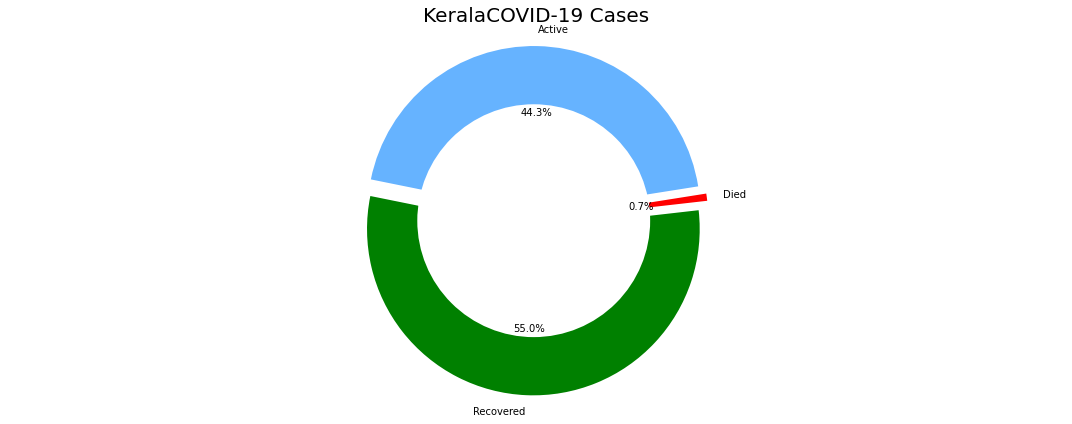

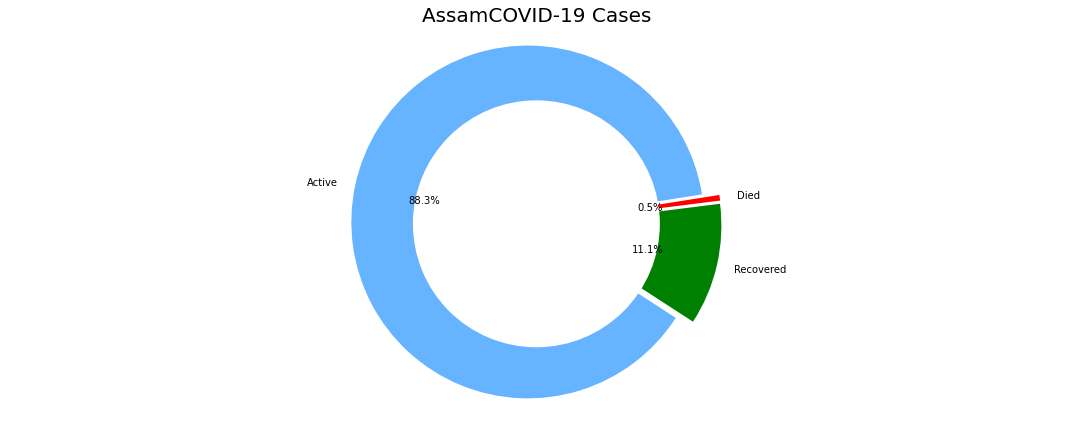

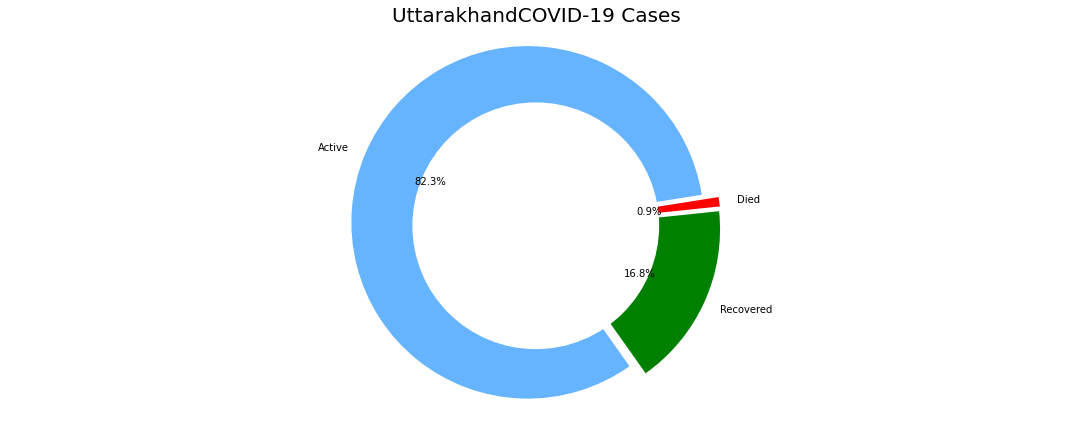

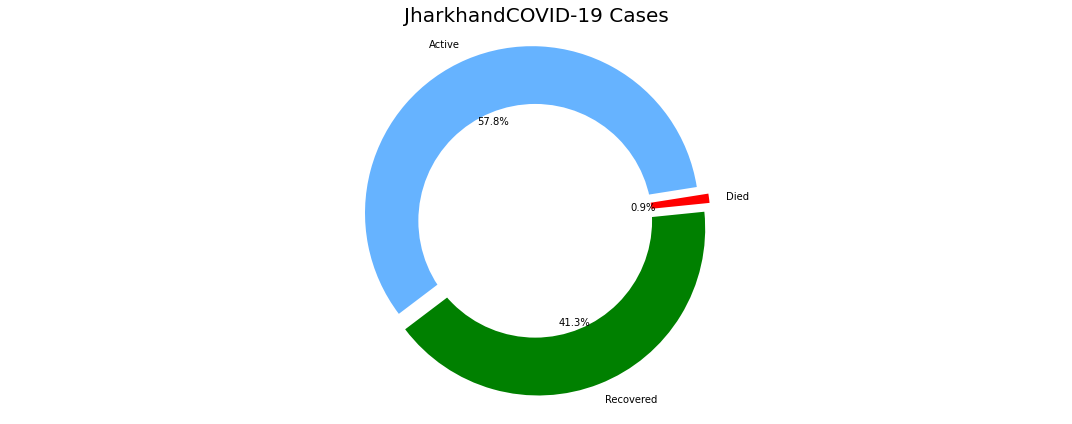

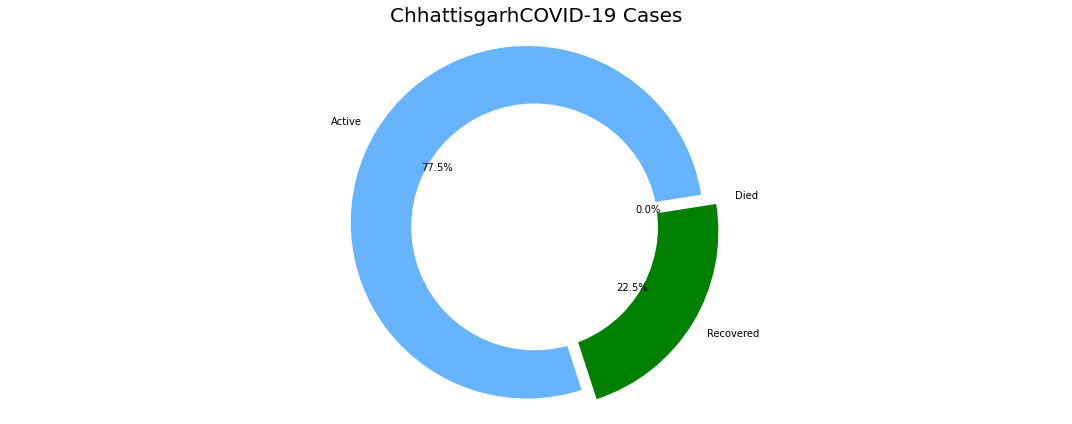

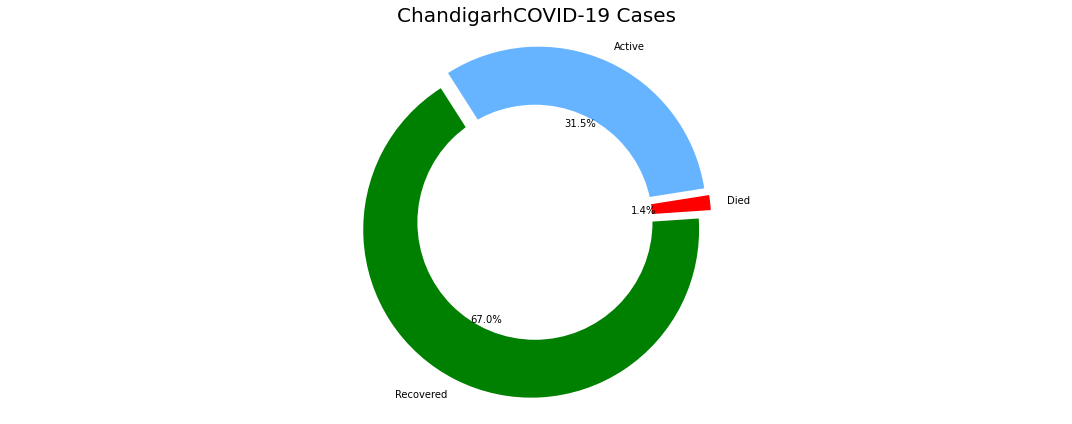

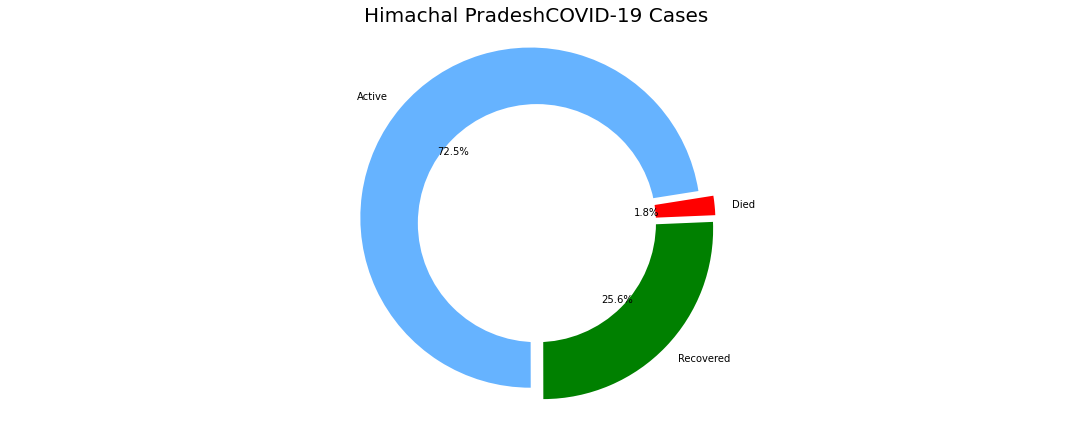

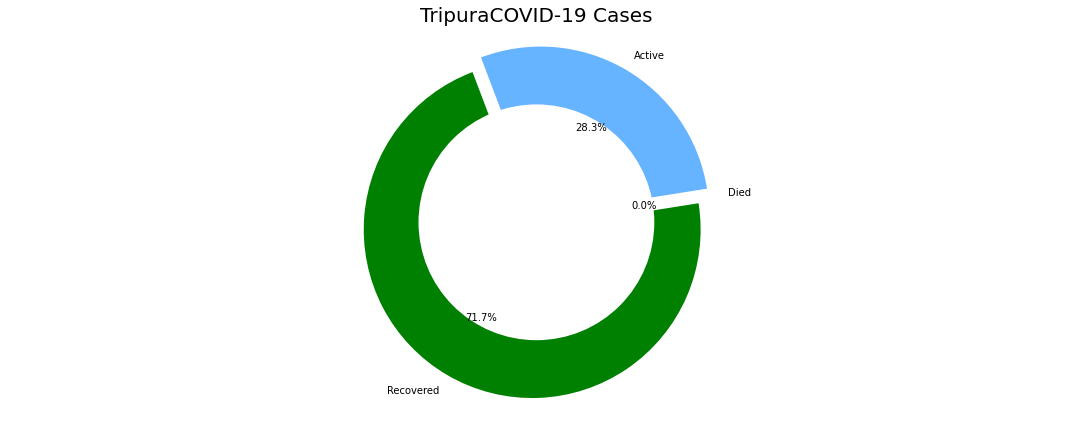

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1080x432 with 1 Axes>

In [171]:
total_cases_india = 0
cured_cases_india = 0
death_cases_india = 0
active_cases_india = 0
state_df = pd.DataFrame()

for state in States:
    one_state_df = df_final_India.loc[df_final_India['State/UnionTerritory'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    total_cases = one_state_df['Confirmed'].values[-1]
    cured = one_state_df['Cured'].values[-1]
    deaths = one_state_df['Deaths'].values[-1]
    active = total_cases - cured - deaths
    plot_pie(active, cured, deaths,state)
    total_cases_india += total_cases
    cured_cases_india += cured
    death_cases_india += deaths
    active_cases_india += active

In [172]:
state_df.reset_index(inplace = True,drop = True)
state_df


State/UnionTerritory       Date    Cured  Deaths Confirmed  \
0                        Maharashtra 2020-05-29  17918.0  1897.0   56948.0   
1                         Tamil Nadu 2020-05-29   9909.0   133.0   18545.0   
2                              Delhi 2020-05-29   7264.0   303.0   15257.0   
3                            Gujarat 2020-05-29   7549.0   938.0   15195.0   
4                          Rajasthan 2020-05-29   4457.0   173.0    7703.0   
5                     Madhya Pradesh 2020-05-29   3927.0   313.0    7261.0   
6                      Uttar Pradesh 2020-05-29   3991.0   182.0    6991.0   
7   Cases being reassigned to states 2020-05-29      0.0     0.0    4332.0   
8                        West Bengal 2020-05-29   1578.0   289.0    4192.0   
9                     Andhra Pradesh 2020-05-29   2057.0    58.0    3171.0   
10                             Bihar 2020-05-29   1083.0    15.0    3061.0   
11                         Karnataka 2020-05-29    781.0    47.0    2418.0   
12                            Punjab 2020-05-29   1918.0    40.0    2139.0   
13                         Telengana 2020-05-29   1284.0    63.0    2098.0   
14                 Jammu and Kashmir 2020-05-29    854.0    26.0    1921.0   
15                            Odisha 2020-05-29    733.0     7.0    1593.0   
16                           Haryana 2020-05-29    838.0    18.0    1381.0   
17                            Kerala 2020-05-29    552.0     7.0    1004.0   
18                             Assam 2020-05-29     87.0     4.0     781.0   
19                       Uttarakhand 2020-05-29     79.0     4.0     469.0   
20                         Jharkhand 2020-05-29    185.0     4.0     448.0   
21                      Chhattisgarh 2020-05-29     83.0     0.0     369.0   
22                        Chandigarh 2020-05-29    187.0     4.0     279.0   
23                  Himachal Pradesh 2020-05-29     70.0     5.0     273.0   
24                           Tripura 2020-05-29    165.0     0.0     230.0   
25                        Unassigned 2020-05-29      0.0     0.0       0.0   

   New Cases  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7        0.0  
8        0.0  
9        0.0  
10       0.0  
11       0.0  
12       0.0  
13       0.0  
14       0.0  
15       0.0  
16       0.0  
17       0.0  
18       0.0  
19       0.0  
20       0.0  
21       0.0  
22       0.0  
23       0.0  
24       0.0  
25       0.0

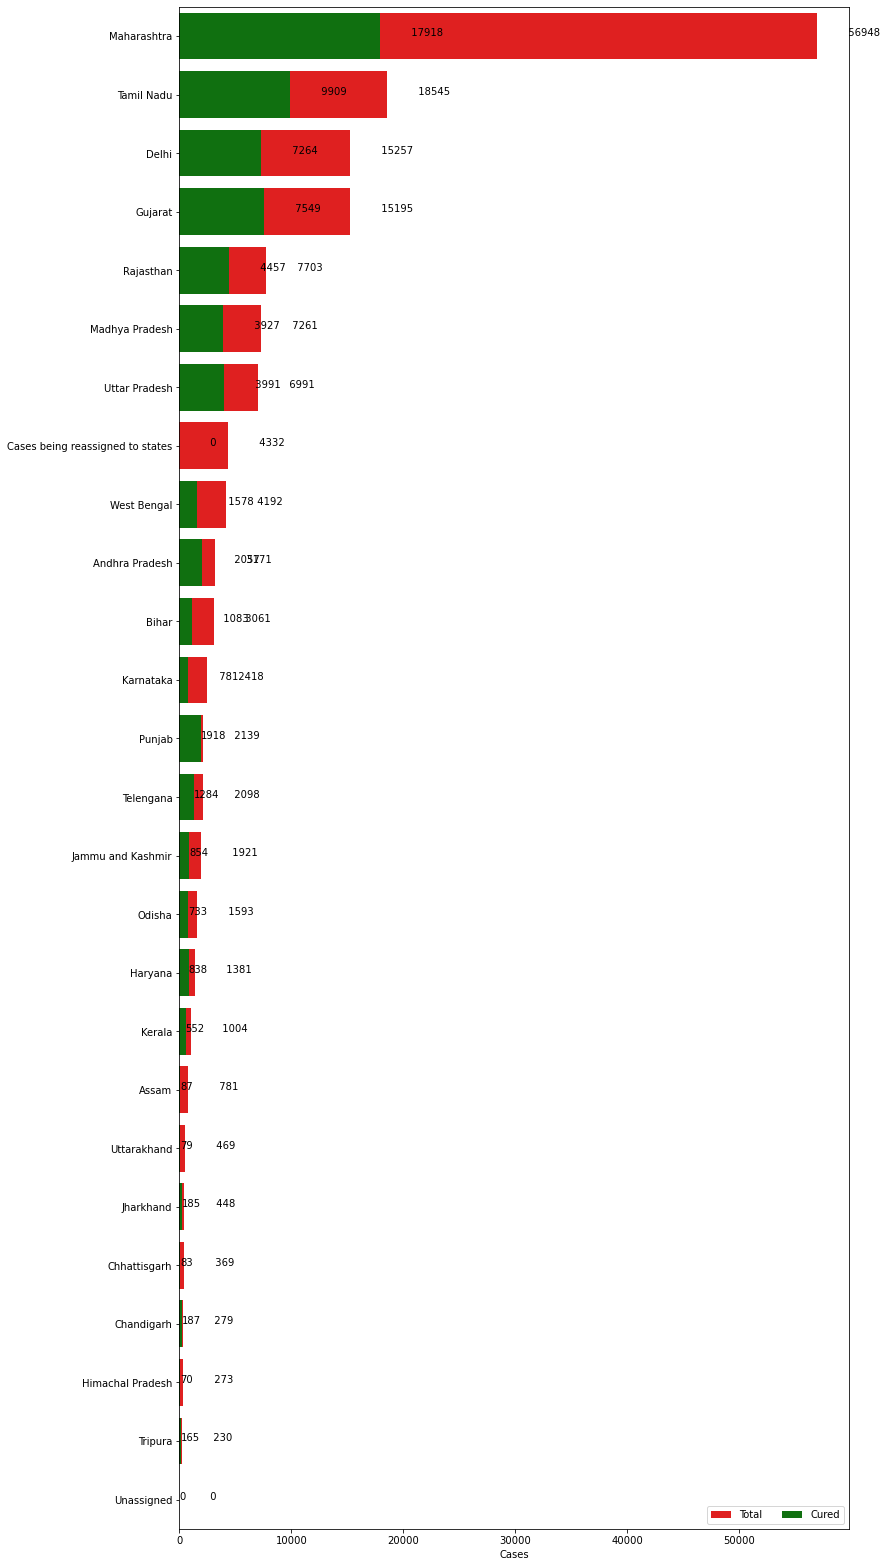

In [173]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
i = 0
for p in ax.patches:
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(int(p.get_width())), (x, y))
    else:
        ax.annotate(int(p.get_width()), (x, y))
        
    i += 1


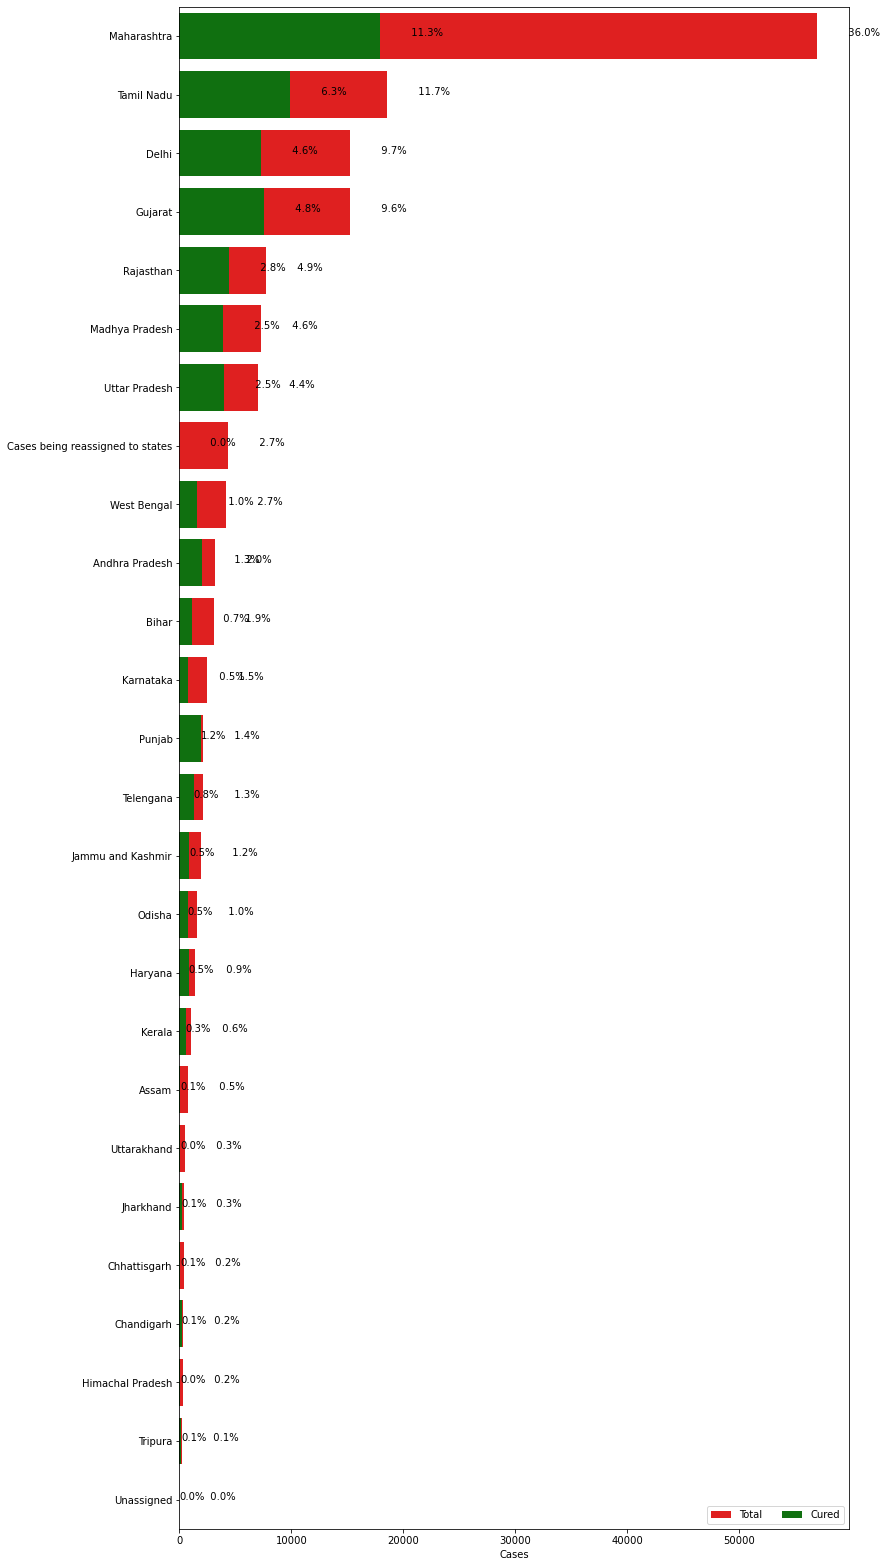

In [174]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(percentage), (x, y))
    else:
        ax.annotate(percentage, (x, y))
        
    i += 1

# Overall Covid19 Status in India

Total infected cases in India:  158059.0
Total cured cases in India:  67549.0
Total active cases in India:  85980.0
Total death cases in India:  4530.0


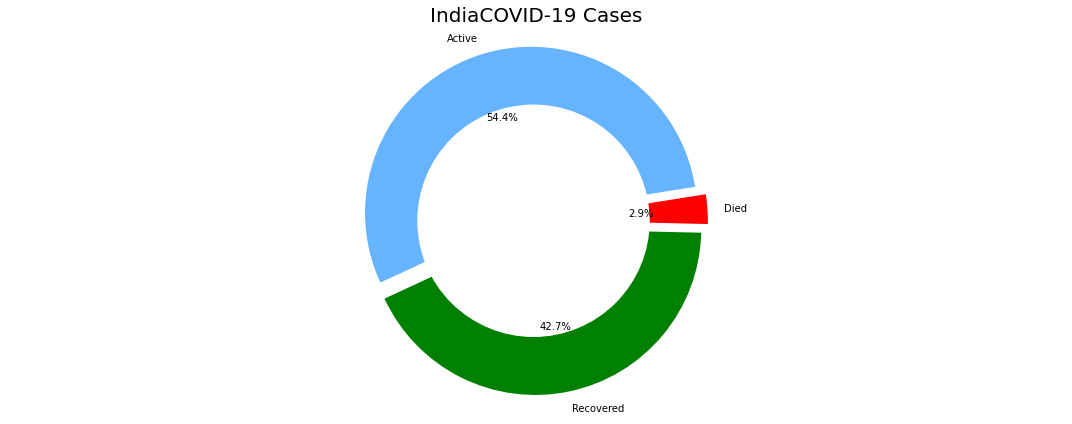

In [175]:
print("Total infected cases in India: ", total_cases_india)
print("Total cured cases in India: ", cured_cases_india)
print("Total active cases in India: ", active_cases_india)
print("Total death cases in India: ", death_cases_india)
plot_pie(active_cases_india, cured_cases_india, death_cases_india, "India")

# VISUALISING THE SPREADS GEOGRAPHICALLY

In [176]:
India_coord.rename(columns = {"Name of State / UT" : "State/UnionTerritory"},inplace = True)

In [177]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar ',
 'Arunachal Pradesh ',
 'Assam',
 'Assam ',
 'Bihar',
 'Bihar ',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chandigarh ',
 'Chhattisgarh',
 'Chhattisgarh ',
 'Dadra And Nagar Haveli ',
 'Goa ',
 'Gujarat',
 'Himachal Pradesh',
 'Himachal Pradesh ',
 'Jammu and Kashmir',
 'Jharkhand',
 'Jharkhand ',
 'Lakshadweep ',
 'Madhya Pradesh',
 'Madhya Pradesh ',
 'Manipur ',
 'Meghalaya ',
 'Mizoram ',
 'Nagaland ',
 'Odisha',
 'Orissa ',
 'Puducherry ',
 'Sikkim ',
 'Tripura',
 'Tripura ',
 'Unassigned',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh',
 'West Bengal',
 'West Bengal '}

In [178]:
India_coord['State/UnionTerritory'] = India_coord['State/UnionTerritory'].str.strip()
state_df['State/UnionTerritory'] = state_df['State/UnionTerritory'].str.strip()

In [179]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Arunachal Pradesh',
 'Cases being reassigned to states',
 'Dadra And Nagar Haveli',
 'Goa',
 'Gujarat',
 'Jammu and Kashmir',
 'Lakshadweep',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Orissa',
 'Puducherry',
 'Sikkim',
 'Unassigned',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [180]:
India_coord.loc[India_coord.shape[0]] = ['Gujarat','22.2587','71.1924']
India_coord

State/UnionTerritory   Latitude  Longitude
0                    Andaman And Nicobar  11.667026  92.735983
1                         Andhra Pradesh  14.750429  78.570026
2                      Arunachal Pradesh  27.100399  93.616601
3                                  Assam  26.749981  94.216667
4                                  Bihar  25.785414  87.479973
5                             Chandigarh  30.719997  76.780006
6                           Chhattisgarh   22.09042  82.159987
7                 Dadra And Nagar Haveli  20.266578  73.016618
8                                  Delhi  28.669993  77.230004
9                                    Goa  15.491997  73.818001
10                               Haryana  28.450006  77.019991
11                      Himachal Pradesh  31.100025  77.166597
12  Union Territory of Jammu and Kashmir      33.45      76.24
13                             Jharkhand  23.800393  86.419986
14                             Karnataka  12.570381  76.919997
15                                Kerala   8.900373  76.569993
16                           Lakshadweep  10.562573  72.636867
17                        Madhya Pradesh  21.300391  76.130019
18                           Maharashtra  19.250232  73.160175
19                               Manipur  24.799971  93.950017
20                             Meghalaya  25.570492  91.880014
21                               Mizoram  23.710399  92.720015
22                              Nagaland  25.666998   94.11657
23                                Orissa   19.82043  85.900017
24                            Puducherry  11.934994      79.83
25                                Punjab  31.519974  75.980003
26                             Rajasthan  26.449999  74.639981
27                                Sikkim   27.33333  88.616647
28                             Telengana    18.1124    79.0193
29                            Tamil Nadu  12.920386  79.150042
30                               Tripura  23.835404  91.279999
31                         Uttar Pradesh  27.599981  78.050006
32                           Uttarakhand  30.320409  78.050006
33                           West Bengal   22.58039  88.329947
34             Union Territory of Ladakh       34.1      77.34
35                               Gujarat    22.2587    71.1924

In [181]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Arunachal Pradesh',
 'Cases being reassigned to states',
 'Dadra And Nagar Haveli',
 'Goa',
 'Jammu and Kashmir',
 'Lakshadweep',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Orissa',
 'Puducherry',
 'Sikkim',
 'Unassigned',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [182]:
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Andaman And Nicobar", 
                                        "Andaman and Nicobar Islands",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Ladakh", 
                                        "Ladakh",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Orissa", 
                                        "Odisha",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",India_coord['State/UnionTerritory'])

In [183]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Cases being reassigned to states',
 'Dadar Nagar Haveli',
 'Goa',
 'Ladakh',
 'Lakshadweep',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Puducherry',
 'Sikkim',
 'Unassigned'}

In [184]:
df_full = pd.merge(India_coord,state_df,on='State/UnionTerritory').reset_index(drop = True)
df_full

State/UnionTerritory   Latitude  Longitude       Date    Cured  Deaths  \
0        Andhra Pradesh  14.750429  78.570026 2020-05-29   2057.0    58.0   
1                 Assam  26.749981  94.216667 2020-05-29     87.0     4.0   
2                 Bihar  25.785414  87.479973 2020-05-29   1083.0    15.0   
3            Chandigarh  30.719997  76.780006 2020-05-29    187.0     4.0   
4          Chhattisgarh   22.09042  82.159987 2020-05-29     83.0     0.0   
5                 Delhi  28.669993  77.230004 2020-05-29   7264.0   303.0   
6               Haryana  28.450006  77.019991 2020-05-29    838.0    18.0   
7      Himachal Pradesh  31.100025  77.166597 2020-05-29     70.0     5.0   
8     Jammu and Kashmir      33.45      76.24 2020-05-29    854.0    26.0   
9             Jharkhand  23.800393  86.419986 2020-05-29    185.0     4.0   
10            Karnataka  12.570381  76.919997 2020-05-29    781.0    47.0   
11               Kerala   8.900373  76.569993 2020-05-29    552.0     7.0   
12       Madhya Pradesh  21.300391  76.130019 2020-05-29   3927.0   313.0   
13          Maharashtra  19.250232  73.160175 2020-05-29  17918.0  1897.0   
14               Odisha   19.82043  85.900017 2020-05-29    733.0     7.0   
15               Punjab  31.519974  75.980003 2020-05-29   1918.0    40.0   
16            Rajasthan  26.449999  74.639981 2020-05-29   4457.0   173.0   
17            Telengana    18.1124    79.0193 2020-05-29   1284.0    63.0   
18           Tamil Nadu  12.920386  79.150042 2020-05-29   9909.0   133.0   
19              Tripura  23.835404  91.279999 2020-05-29    165.0     0.0   
20        Uttar Pradesh  27.599981  78.050006 2020-05-29   3991.0   182.0   
21          Uttarakhand  30.320409  78.050006 2020-05-29     79.0     4.0   
22          West Bengal   22.58039  88.329947 2020-05-29   1578.0   289.0   
23              Gujarat    22.2587    71.1924 2020-05-29   7549.0   938.0   

   Confirmed New Cases  
0     3171.0       0.0  
1      781.0       0.0  
2     3061.0       0.0  
3      279.0       0.0  
4      369.0       0.0  
5    15257.0       0.0  
6     1381.0       0.0  
7      273.0       0.0  
8     1921.0       0.0  
9      448.0       0.0  
10    2418.0       0.0  
11    1004.0       0.0  
12    7261.0       0.0  
13   56948.0       0.0  
14    1593.0       0.0  
15    2139.0       0.0  
16    7703.0       0.0  
17    2098.0       0.0  
18   18545.0       0.0  
19     230.0       0.0  
20    6991.0       0.0  
21     469.0       0.0  
22    4192.0       0.0  
23   15195.0       0.0

In [185]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [186]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='OpenStreetMap')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

In [187]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenwatercolor')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# Lets check the trend of the virus

In [188]:
df_daywise_India = df_final_India.groupby("Date")['Confirmed','Cured','Deaths',"New Cases"].sum().reset_index()
df_daywise_India

Date  Confirmed    Cured  Deaths  New Cases
0   2020-01-30        1.0      0.0     0.0        0.0
1   2020-01-31        1.0      0.0     0.0        0.0
2   2020-02-01        2.0      0.0     0.0        1.0
3   2020-02-02        3.0      0.0     0.0        1.0
4   2020-02-03        3.0      0.0     0.0        0.0
..         ...        ...      ...     ...        ...
116 2020-05-25   138845.0  57721.0  4021.0     6977.0
117 2020-05-26   145380.0  60491.0  4167.0     6535.0
118 2020-05-27   151767.0  64426.0  4337.0     6387.0
119 2020-05-28   158333.0  67692.0  4531.0     6566.0
120 2020-05-29   158333.0  67692.0  4531.0        0.0

[121 rows x 5 columns]

In [189]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise_India['Date'], y = df_daywise_India['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [190]:
fig = px.bar(df_daywise_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [191]:
fig = px.bar(df_daywise_India, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [192]:
fig = px.line(x=df_daywise_India['Date'], y=df_daywise_India['New Cases'], labels = {'x': "Dates",'y': "Counts"})
fig.update_layout( showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

# THANK YOU